# 1 - Simple and Multiple Regression

## 1.1 Introduction

This first Chapter will cover topics in simple and multiple regression, as well as the supporting tasks that are important in preparing to analyze your data, e.g., data checking, getting familiar with your data file, and examining the distribution of your variables. We will illustrate the basics of simple and multiple regression and demonstrate the importance of inspecting, checking and verifying your data before accepting the results of your analysis.

In this chapter, and in subsequent chapters, I will be using a data file called elemapi from the California Department of Education's API 2000 dataset. This data file contains a measure of school academic performance as well as other attributes of the elementary schools, such as, class size, enrollment, poverty, etc.



## 1.2 A First Regression Analysis

Let's dive right in and perform a regression analysis using the variables api00, acs_k3, meals and full. These measure the academic performance of the school (api00), the average class size in kindergarten through 3rd grade (acs_k3), the percentage of students receiving free meals (meals) - which is an indicator of poverty, and the percentage of teachers who have full teaching credentials (full). We expect that better academic performance would be associated with lower class size, fewer students receiving free meals, and a higher percentage of teachers having full teaching credentials.

First I will import some of the necessary modules in python. Typically I will use statsmodels here whose result is the same as lm in R. sklearn is very popular in data mining considering speed but its result will be different from R or SAS.

In [2]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
import math
import time

%matplotlib inline 
plt.rcParams['figure.figsize'] = (16, 12)

mypath =  r'E:/python/Dataset/'

elemapi = pd.read_csv(mypath + r'elemapi.csv')   

print (elemapi[['api00', 'acs_k3', 'meals',  'full']].head())

   api00  acs_k3  meals  full
0    693    16.0   67.0  76.0
1    570    15.0   92.0  79.0
2    546    17.0   97.0  68.0
3    571    20.0   90.0  87.0
4    478    18.0   89.0  87.0


There are different way to run linear regression in statsmodels. One is using formula as R did. Another one is input the data directly. I will show them both here. And both of them will give the same result.

Personally I prefer the first way, the reasons are:

1. If we use the second way(sm.OLS) to run the model, by default, it does not include intercept part in the model. To include intercept, we need to manually add constant to the data by sm.add_constant.

2. the first way will take care of the missing data while the second will not.

---------------------------------------- smf.ols in R formula ----------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     571.0
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           6.54e-79
Time:                        23:17:33   Log-Likelihood:                -2372.1
No. Observations:                 400   AIC:                             4748.
Df Residuals:                     398   BIC:                             4756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

Text(0.5, 1.0, 'Linear Regression Plot')

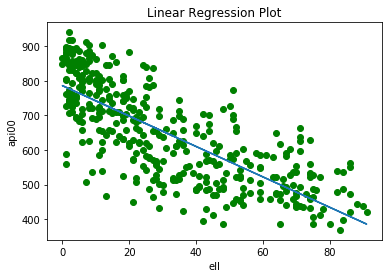

In [3]:
'''
1. using formula as R did
'''
print ('-'*40 + ' smf.ols in R formula ' + '-'*40 + '\n')
lm = smf.ols(formula = 'api00 ~ ell', data = elemapi).fit()
print (lm.summary())

plt.figure()
plt.scatter(elemapi.ell, elemapi.api00, c = 'g')
plt.plot(elemapi.ell, lm.params[0] + lm.params[1] * elemapi.ell)
plt.xlabel('ell')
plt.ylabel('api00')
plt.title("Linear Regression Plot")

## 1.3 Multiple variable regression


Most of the time one variable in the model will not give us enough power to use. Usually multiple variables will be used in the model. As described about, let's try 3 variables in the model.

In [4]:
'''
1. using formula as R did
'''
lm = smf.ols(formula = 'api00 ~ acs_k3 + meals + full', data = elemapi).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     213.4
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           5.73e-75
Time:                        23:17:33   Log-Likelihood:                -1744.6
No. Observations:                 313   AIC:                             3497.
Df Residuals:                     309   BIC:                             3512.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    906.7392     28.265     32.080      0.0

however, if I rum sm.OLS(elemapi['api00'], sm.add_constant(elemapi[['acs_k3', 'meals', 'full']])).fit() 

I will get errors like "LinAlgError: SVD did not converge". The reason is there are missing data in 'acs_k3' and 'meals'. Thus results in the singular value decomposition of the hat matrix failed. To fix it, I need to drop any row with missing data first. After that, it will run successfully and the result is exactly the same as above.

In [5]:
'''
2. using data input directly
'''
data = elemapi[['api00', 'acs_k3', 'meals',  'full']]
data = data.dropna(axis = 0, how = 'any')

lm2 = sm.OLS(data['api00'], sm.add_constant(data[['acs_k3', 'meals',  'full']])).fit()
print (lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     213.4
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           5.73e-75
Time:                        23:17:33   Log-Likelihood:                -1744.6
No. Observations:                 313   AIC:                             3497.
Df Residuals:                     309   BIC:                             3512.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        906.7392     28.265     32.080      0.0

## 1.4 Data Analysis 

Generally, when we get the data we will do some analysis of the data.

For numeric data, we will usualy do:

if there is any missing data
what is the distribution of the data, and its visualization like histogram and box-plot
what is the five numbers: min, 25 percentile, median, 75 percentile, and the max
mean, stdev, length
the correlation between the data
futuremore, is there any outliers in the data?
other plots: pairwise scatter plot, kernal density plot
For categorical data, we will usually do:

is there any missing data?
how many unique values of the data? what is their frequency?
Next we will answer these questions.

we will pick 4 variables from the elemapi data as an example.




### 1.4.1. The df.describe() will gives the summary information like how many non-missing values there, mean, stdev, and the five number summary.

As we can see, api00 and full does not have missing values and their length is 384. acs_k3 has 382 non-missing values, so it has two missing data. meals has 301 non-missing values so it has 83 missings.

In [6]:
sample_data = elemapi[['api00', 'acs_k3', 'meals',  'full']]
print (sample_data.describe())

            api00      acs_k3       meals        full
count  400.000000  398.000000  315.000000  400.000000
mean   647.622500   18.547739   71.993651   66.056800
std    142.248961    5.004933   24.385570   40.297926
min    369.000000  -21.000000    6.000000    0.420000
25%    523.750000   18.000000   57.000000    0.950000
50%    643.000000   19.000000   77.000000   87.000000
75%    762.250000   20.000000   93.000000   97.000000
max    940.000000   25.000000  100.000000  100.000000


### 1.4.2. plot the histogram and the density plot


From the hist plot, the data api00 is pretty even. There is no special concentration.

From the box plot below, we did not see there is any outliers.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


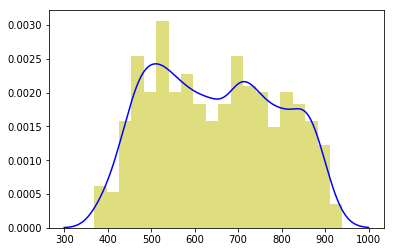

In [7]:
from scipy.stats import gaussian_kde

plt.hist(elemapi.api00, 20, normed = 1, facecolor = 'y', alpha = 0.5)

# add density plot
density = gaussian_kde(elemapi.api00)
xs = np.linspace(300, 1000, 500)
density.covariance_factor = lambda : .2
density._compute_covariance()
plt.plot(xs, density(xs), color = "b")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b0ac4afcf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b0ac4c03c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b0ac4afba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b0ac4c0a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b0ac4c0da0>],
 'means': []}

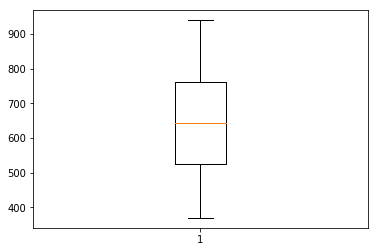

In [8]:
plt.boxplot(elemapi.api00, 0, 'gD')

### 1.4.3. The correlation of the data

df.corr() 

will give the correlation matrix of all the variables. Pick the corresponding row or column will give us the correlation between that variables with all the other variables.

In [9]:
# check correlation between each variable and api00
print (elemapi.corr().ix['api00', :].sort_values())

mealcat    -0.867260
meals      -0.819300
ell        -0.767634
not_hsg    -0.683255
emer       -0.582731
yr_rnd     -0.475440
hsg        -0.355809
enroll     -0.318172
mobility   -0.206410
growth     -0.108158
acs_k3     -0.095546
dnum       -0.011383
snum        0.216457
acs_46      0.232912
some_col    0.261527
full        0.411125
col_grad    0.527301
grad_sch    0.633241
avg_ed      0.792954
api99       0.985343
api00       1.000000
Name: api00, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


### 1.4.4. scatter plot of all the variables in the data

This will scatter plot all the pairs of the data so that we can easily find their relations. If there is too many variables, this is not a good way because there are too many graphs to display. In that case, the correlation will be easier to check.

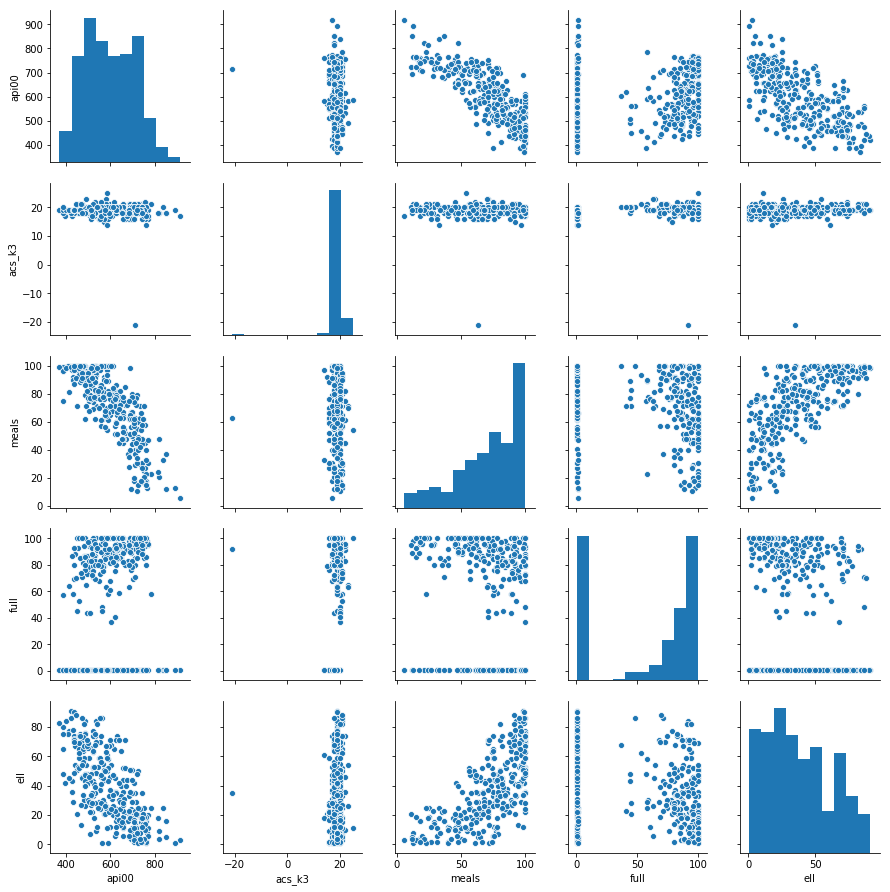

In [10]:
sns.pairplot(elemapi[['api00', 'acs_k3', 'meals',  'full', 'ell']].dropna(how = 'any', axis = 0))

### 1.4.5. kernel density plot

R has a very friendly function 

plot(density(data, bw=0.5)) 

to let us plot the kernal density function. Here is try to mimic that in python. From the plot we can observe that the ell variable skewed to the right.

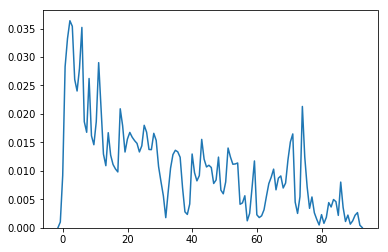

In [11]:
sns.kdeplot(np.array(elemapi.ell), bw=0.5)

### 1.4.6. categorical variable frequency

For categorical variable, most of the time we care about if there is any missing data, and what is the frequency of the values. We can see for acs_k3, there are about 137 data points equal to 19.

In [12]:
elemapi.acs_k3.value_counts(dropna = False).sort_index()

-21.0      3
-20.0      2
-19.0      1
 14.0      2
 15.0      1
 16.0     14
 17.0     20
 18.0     64
 19.0    143
 20.0     97
 21.0     40
 22.0      7
 23.0      3
 25.0      1
NaN        2
Name: acs_k3, dtype: int64

### 1.5 Summary

Most of the time, when I get the data, I will do single variable analysis to check the distribution of my data and missing information. If data is not big, I will check the pairwise relations by pairwise scatter plot or the correlations.

If there is missing, how to do? Drop the data or consider of any way to impute the missingt data?

If the relation is not linear, what shall we do?

# 2 - Regression Diagnostics

# 2.1 Regression Diagnostics

When run regression models, you need to do regression disgnostics. Without verifying that your data have met the regression assumptions, your results may be misleading. This section will explore how to do regression diagnostics.

Linearity - the relationships between the predictors and the outcome variable should be linear

Normality - the errors should be normally distributed - technically normality is necessary only for the t-tests to be valid, estimation of the coefficients only requires that the errors be identically and independently distributed

Homogeneity of variance (homoscedasticity) - the error variance should be constant

Independence - the errors associated with one observation are not correlated with the errors of any other observation

Errors in variables - predictor variables are measured without error

Model specification - the model should be properly specified (including all relevant variables, and excluding irrelevant variables)

Additionally, there are issues that can arise during the analysis that, while strictly speaking, are not assumptions of regression, are none the less, of great concern to regression analysts.

Influence - individual observations that exert undue influence on the coefficients

Collinearity - predictors that are highly collinear, i.e. linearly related, can cause problems in estimating the regression coefficients.



# 2.2 Unusual and influential data

A single observation that is substantially different from all other observations can make a large difference in the results of your regression analysis. If a single observation (or small group of observations) substantially changes your results, you would want to know about this and investigate further. There are three ways that an observation can be unusual.

Outliers: In linear regression, an outlier is an observation with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem.

Leverage: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

Influence: An observation is said to be influential if removing the observation substantially changes the estimate of coefficients. Influence can be thought of as the product of leverage and outlierness.

How can we identify these three types of observations? Let's look at an example dataset called crime. This dataset appears in Statistical Methods for Social Sciences, Third Edition by Alan Agresti and Barbara Finlay (Prentice Hall, 1997). The variables are state id (sid), state name (state), violent crimes per 100,000 people (crime), murders per 1,000,000 (murder), the percent of the population living in metropolitan areas (pctmetro), the percent of the population that is white (pctwhite), percent of population with a high school education or above (pcths), percent of population living under poverty line (poverty), and percent of population that are single parents (single).

In [13]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
import math
import time

%matplotlib inline 
plt.rcParams['figure.figsize'] = (16, 12)

mypath =  r'E:/python/Dataset/'

crime = pd.read_csv(mypath + r'crime.csv')

In [14]:
crime.describe()

,sid,crime,murder,pctmetro,pctwhite,pcths,poverty,single
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,26.000000,612.843137,8.727451,67.390196,84.115686,76.223529,14.258824,11.325490
std,14.866069,441.100323,10.717576,21.957133,13.258392,5.592087,4.584242,2.121494
min,1.000000,82.000000,1.600000,24.000000,31.800000,64.300000,8.000000,8.400000
25%,13.500000,326.500000,3.900000,49.550000,79.350000,73.500000,10.700000,10.050000
50%,26.000000,515.000000,6.800000,69.800000,87.600000,76.700000,13.100000,10.900000
75%,38.500000,773.000000,10.350000,83.950000,92.600000,80.100000,17.400000,12.050000
max,51.000000,2922.000000,78.500000,100.000000,98.500000,86.600000,26.400000,22.100000


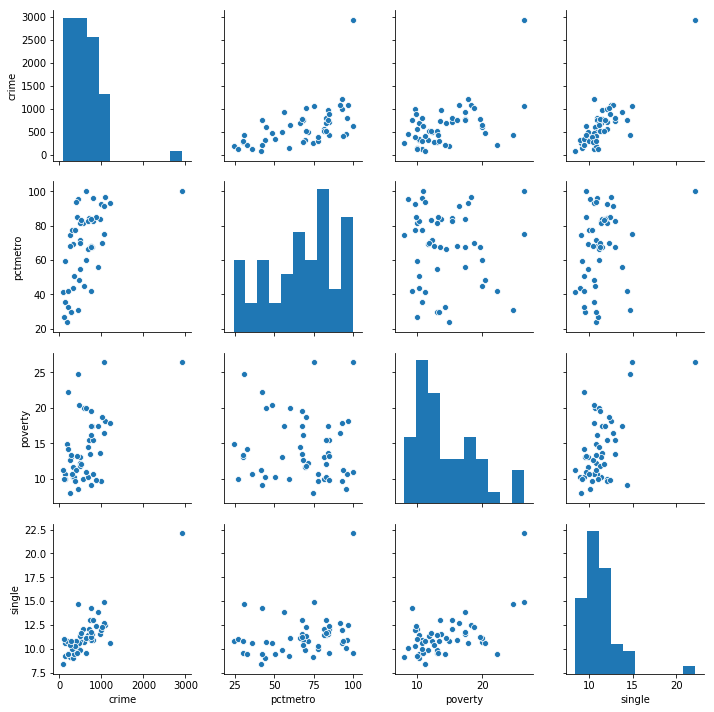

In [15]:
sns.pairplot(crime[['crime', 'pctmetro', 'poverty',  'single']].dropna(how = 'any', axis = 0))

The graphs of crime with other variables show some potential problems. In every plot, we see a data point that is far away from the rest of the data points. Let's make individual graphs of crime with pctmetro and poverty and single so we can get a better view of these scatterplots. We will add the label plot of the state name instead of a point.

Text(0, 0.5, 'crime')

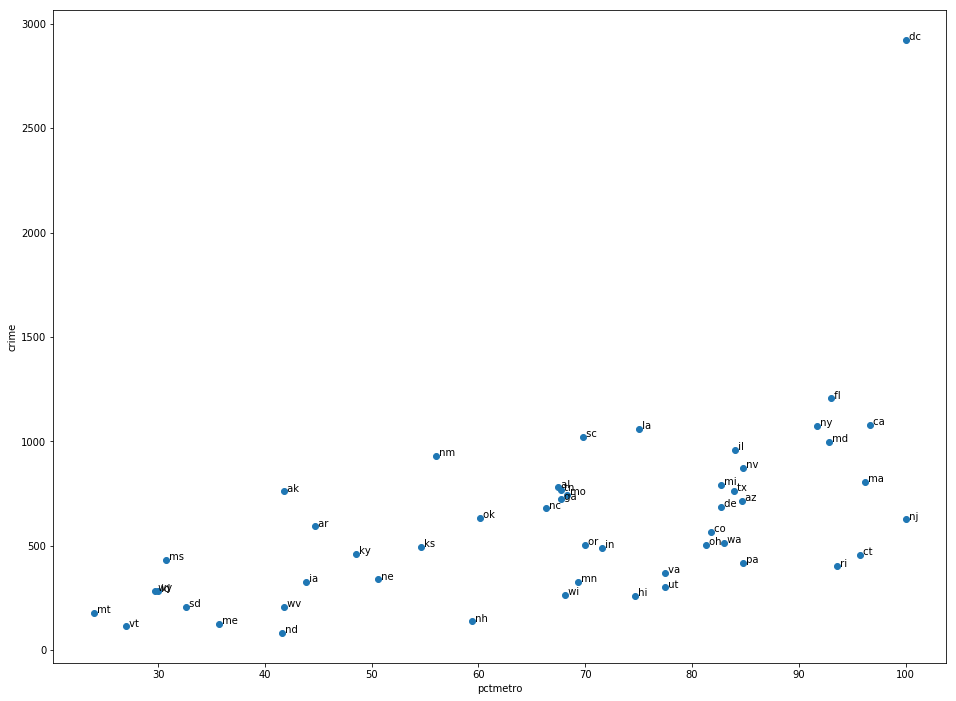

In [16]:
plt.scatter(crime.pctmetro, crime.crime)

for i, state in enumerate(crime.state):
    plt.annotate(state, [crime.pctmetro[i], crime.crime[i]])

plt.xlabel("pctmetro")
plt.ylabel("crime")

All the scatter plots suggest that the observation for state = dc is a point that requires extra attention since it stands out away from all of the other points. We will keep it in mind when we do our regression analysis.

Now let's try the regression predicting crime from pctmetro, poverty and single. We will go step-by-step to identify all the potentially unusual or influential points afterwards. We will output several statistics that we will need for the next few analyses to a dataset called crime1res, and we will explain each statistic in turn. These statistics include the studentized residual (called resid_student), leverage (called leverage), Cook's D (called cooks) and DFFITS (called dffits). We are requesting all of these statistics now so that they can be placed in a single dataset that we will use for the next several examples.

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     82.16
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           1.03e-18
Time:                        23:18:35   Log-Likelihood:                -335.71
No. Observations:                  51   AIC:                             679.4
Df Residuals:                      47   BIC:                             687.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1666.4359    147.852    -11.271      0.0

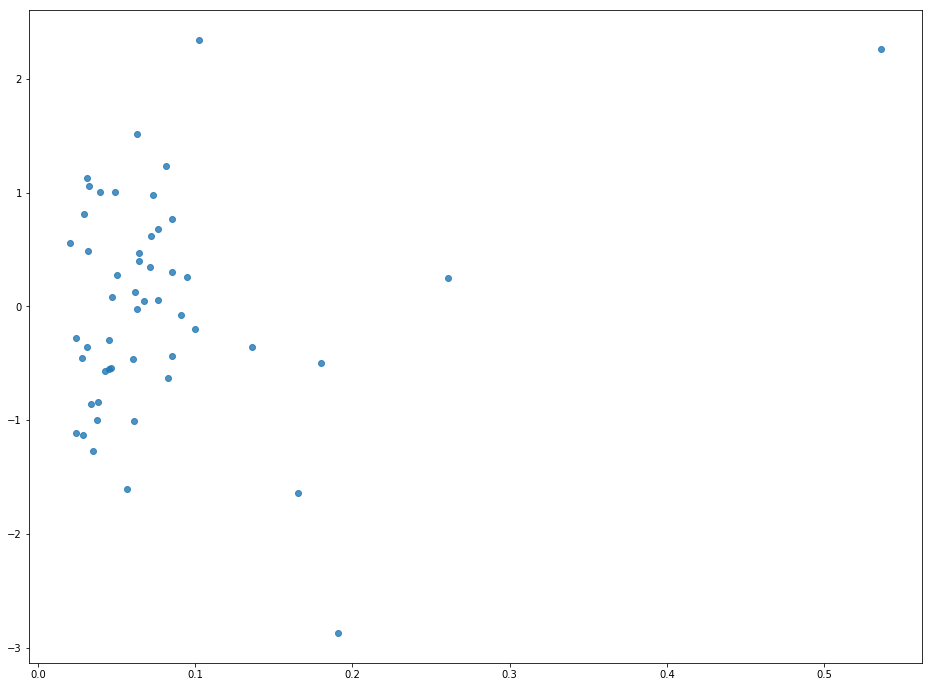

In [17]:
lm = smf.ols(formula = "crime ~ pctmetro + poverty + single", data = crime).fit()
print (lm.summary())

influence = lm.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

print ('\n')
print ('Leverage v.s. Studentized Residuals')
sns.regplot(leverage, lm.resid_pearson,  fit_reg=False)

In [18]:
pd.Series(influence.hat_matrix_diag).describe()

count    51.000000
mean      0.078431
std       0.080285
min       0.020061
25%       0.037944
50%       0.061847
75%       0.083896
max       0.536383
dtype: float64

In [19]:
crime1res = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
crime1res = pd.concat([crime, crime1res], axis = 1)
crime1res.head() 

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single,cooks,dffits,leverage,resid_student
0,1,ak,761,9.0,41.8,75.2,86.6,9.1,14.3,0.007565,0.172247,0.260676,0.290081
1,2,al,780,11.6,67.4,73.5,66.9,17.4,11.5,0.002020,0.089166,0.032089,0.489712
2,3,ar,593,10.2,44.7,82.9,66.3,20.0,10.7,0.014897,0.243153,0.085385,0.795809
3,4,az,715,8.6,84.7,88.6,78.7,15.4,12.1,0.006654,-0.162721,0.033806,-0.869915
4,5,ca,1078,13.1,96.7,79.3,76.2,18.2,12.5,0.000075,0.017079,0.076468,0.059353


Let's examine the studentized residuals as a first means for identifying outliers. We requested the studentized residuals in the above regression in the output statement and named them r. Studentized residuals are a type of standardized residual that can be used to identify outliers. We see three residuals that stick out, -3.57, 2.62 and 3.77.

In [20]:
r = crime1res.resid_student
print ('-'*30 + ' studentized residual ' + '-'*30)
print (r.describe())
print ('\n')

r_sort = crime1res.sort_values(by = 'resid_student')
print ('-'*30 + ' top 5 most negative residuals ' + '-'*30)
print (r_sort.head())
print ('\n')

print ('-'*30 + ' top 5 most positive residuals ' + '-'*30)
print (r_sort.tail())

------------------------------ studentized residual ------------------------------
count    51.000000
mean      0.018402
std       1.133126
min      -3.570789
25%      -0.555460
50%       0.052616
75%       0.599771
max       3.765847
Name: resid_student, dtype: float64


------------------------------ top 5 most negative residuals ------------------------------
    sid state  crime  murder  pctmetro  pctwhite  pcths  poverty  single  \
24   25   ms     434    13.5      30.7      63.3   64.3     24.7    14.7   
17   18   la    1062    20.3      75.0      66.7   68.3     26.4    14.9   
38   39   ri     402     3.9      93.6      92.6   72.0     11.2    10.8   
46   47   wa     515     5.2      83.0      89.4   83.8     12.1    11.7   
34   35   oh     504     6.0      81.3      87.5   75.7     13.0    11.4   

       cooks    dffits  leverage  resid_student  
24  0.602106 -1.735096  0.191012      -3.570789  
17  0.159264 -0.818120  0.165277      -1.838578  
38  0.041165 -0.413655  0.05

We should pay attention to studentized residuals that exceed +2 or -2, and get even more concerned about residuals that exceed +2.5 or -2.5 and even yet more concerned about residuals that exceed +3 or -3. These results show that DC and MS are the most worrisome observations, followed by FL.

Let's show all of the variables in our regression where the studentized residual exceeds +2 or -2, i.e., where the absolute value of the residual exceeds 2. We see the data for the three potential outliers we identified, namely Florida, Mississippi and Washington D.C. Looking carefully at these three observations, we couldn't find any data entry errors, though we may want to do another regression analysis with the extreme point such as DC deleted. We will return to this issue later.

In [21]:
print (crime[abs(r) > 2])

    sid state  crime  murder  pctmetro  pctwhite  pcths  poverty  single
8     9   fl    1206     8.9      93.0      83.5   74.4     17.8    10.6
24   25   ms     434    13.5      30.7      63.3   64.3     24.7    14.7
50   51   dc    2922    78.5     100.0      31.8   73.1     26.4    22.1


Now let's look at the leverage's to identify observations that will have potential great influence on regression coefficient estimates.

Generally, a point with leverage greater than (2k+2)/n should be carefully examined, where k is the number of predictors and n is the number of observations. In our example this works out to (2*3+2)/51 = .15686275, so we can do the following.

In [22]:
leverage = crime1res.leverage
print ('-'*30 + ' Leverage ' + '-'*30)
print (leverage.describe())
print ('\n')

leverage_sort = crime1res.sort_values(by = 'leverage', ascending = False)

print ('-'*30 + ' top 5 highest leverage data points ' + '-'*30)
print (leverage_sort.head())

------------------------------ Leverage ------------------------------
count    51.000000
mean      0.078431
std       0.080285
min       0.020061
25%       0.037944
50%       0.061847
75%       0.083896
max       0.536383
Name: leverage, dtype: float64


------------------------------ top 5 highest leverage data points ------------------------------
    sid state  crime  murder  pctmetro  pctwhite  pcths  poverty  single  \
50   51   dc    2922    78.5     100.0      31.8   73.1     26.4    22.1   
0     1   ak     761     9.0      41.8      75.2   86.6      9.1    14.3   
24   25   ms     434    13.5      30.7      63.3   64.3     24.7    14.7   
48   49   wv     208     6.9      41.8      96.3   66.0     22.2     9.4   
17   18   la    1062    20.3      75.0      66.7   68.3     26.4    14.9   

       cooks    dffits  leverage  resid_student  
50  3.203429  4.050610  0.536383       3.765847  
0   0.007565  0.172247  0.260676       0.290081  
24  0.602106 -1.735096  0.191012      -3

As we have seen, DC is an observation that both has a large residual and large leverage. Such points are potentially the most influential. We can make a plot that shows the leverage by the residual squared and look for observations that are jointly high on both of these measures. We can do this using a leverage versus residual-squared plot. Using residual squared instead of residual itself, the graph is restricted to the first quadrant and the relative positions of data points are preserved. This is a quick way of checking potential influential observations and outliers at the same time. Both types of points are of great concern for us.

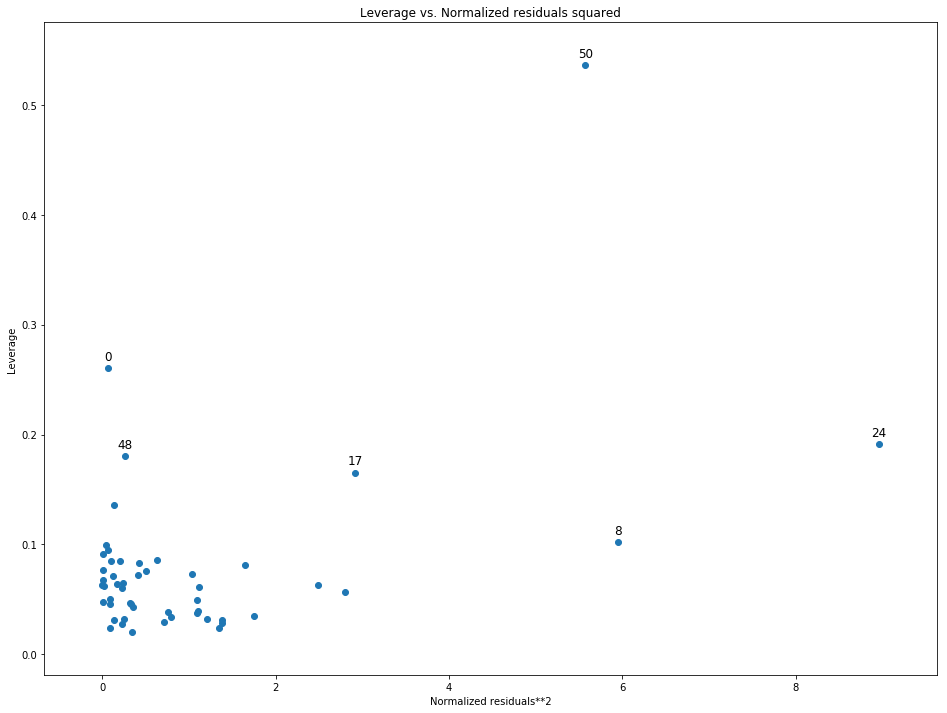

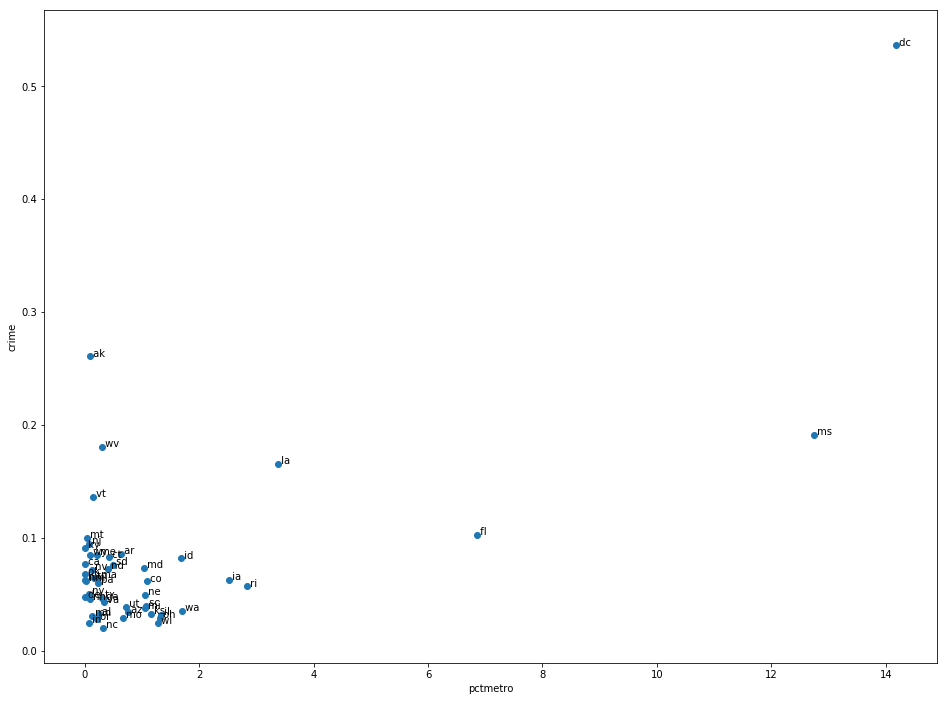

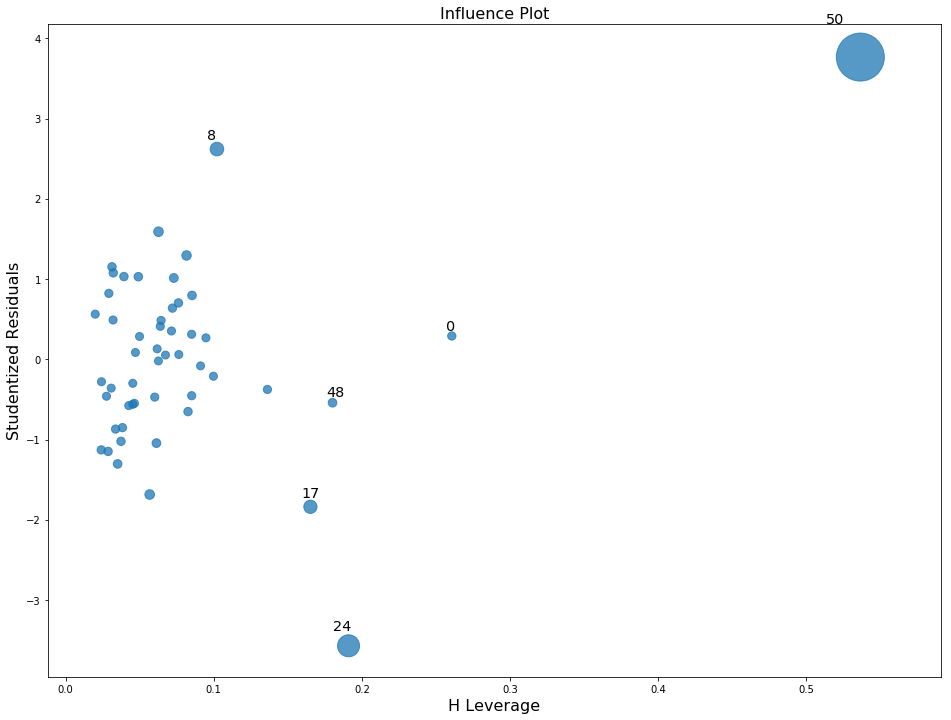

In [23]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(lm)
plt.show()

plt.scatter(crime1res.resid_student ** 2, crime1res.leverage)
for i, state in enumerate(crime.state):
    plt.annotate(state, [(crime1res.resid_student ** 2)[i],  crime1res.leverage[i]])
plt.xlabel("pctmetro")
plt.ylabel("crime")
plt.show()

influence_plot(lm)
plt.show()

The point for DC catches our attention having both the highest residual squared and highest leverage, suggesting it could be very influential. The point for MS has almost as large a residual squared, but does not have the same leverage. We'll look at those observations more carefully by listing them below.

Now let's move on to overall measures of influence. Specifically, let's look at Cook's D and DFITS. These measures both combine information on the residual and leverage. Cook's D and DFITS are very similar except that they scale differently, but they give us similar answers.

The lowest value that Cook's D can assume is zero, and the higher the Cook's D is, the more influential the point is. The conventional cut-off point is 4/n. We can list any observation above the cut-off point by doing the following. We do see that the Cook's D for DC is by far the largest.

Now let's take a look at DFITS. The conventional cut-off point for DFITS is 2*sqrt(k/n). DFITS can be either positive or negative, with numbers close to zero corresponding to the points with small or zero influence. As we see, DFITS also indicates that DC is, by far, the most influential observation.

In [24]:
crime1res[abs(crime1res.dffits) > 2 * math.sqrt(3.0 / 51)]

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single,cooks,dffits,leverage,resid_student
8,9,fl,1206,8.9,93.0,83.5,74.4,17.8,10.6,0.173629,0.883820,0.102202,2.619523
17,18,la,1062,20.3,75.0,66.7,68.3,26.4,14.9,0.159264,-0.818120,0.165277,-1.838578
24,25,ms,434,13.5,30.7,63.3,64.3,24.7,14.7,0.602106,-1.735096,0.191012,-3.570789
50,51,dc,2922,78.5,100.0,31.8,73.1,26.4,22.1,3.203429,4.050610,0.536383,3.765847


The above measures are general measures of influence. You can also consider more specific measures of influence that assess how each coefficient is changed by deleting the observation. This measure is called DFBETA and is created for each of the predictors. Apparently this is more computationally intensive than summary statistics such as Cook's D because the more predictors a model has, the more computation it may involve. We can restrict our attention to only those predictors that we are most concerned with and to see how well behaved those predictors are.

In [25]:
crimedfbeta = pd.concat([crime1res, pd.DataFrame(influence.dfbetas, columns = ['dfb_intercept', 'dfb_pctmetro', 'dfb_poverty', 'dfb_single'])], axis = 1)
print (crimedfbeta.head())

# print pd.DataFrame(OLSInfluence(lm).dfbetas).head()

   sid state  crime  murder  pctmetro  pctwhite  pcths  poverty  single  \
0    1   ak     761     9.0      41.8      75.2   86.6      9.1    14.3   
1    2   al     780    11.6      67.4      73.5   66.9     17.4    11.5   
2    3   ar     593    10.2      44.7      82.9   66.3     20.0    10.7   
3    4   az     715     8.6      84.7      88.6   78.7     15.4    12.1   
4    5   ca    1078    13.1      96.7      79.3   76.2     18.2    12.5   

      cooks    dffits  leverage  resid_student  dfb_intercept  dfb_pctmetro  \
0  0.007565  0.172247  0.260676       0.290081      -0.015624     -0.106185   
1  0.002020  0.089166  0.032089       0.489712       0.000577      0.012429   
2  0.014897  0.243153  0.085385       0.795809       0.067038     -0.068748   
3  0.006654 -0.162721  0.033806      -0.869915       0.052022     -0.094761   
4  0.000075  0.017079  0.076468       0.059353      -0.007311      0.012640   

   dfb_poverty  dfb_single  
0    -0.131340    0.145183  
1     0.055285  

The value for DFB_single for Alaska is 0.14, which means that by being included in the analysis (as compared to being excluded), Alaska increases the coefficient for single by 0.14 standard errors, i.e., 0.14 times the standard error for BSingle or by (0.14 * 15.5). Because the inclusion of an observation could either contribute to an increase or decrease in a regression coefficient, DFBETAs can be either positive or negative. A DFBETA value in excess of 2/sqrt(n) merits further investigation. In this example, we would be concerned about absolute values in excess of 2/sqrt(51) or 0.28.

We can plot all three DFBETA values against the state id in one graph shown below. We add a line at 0.28 and -0.28 to help us see potentially troublesome observations. We see the largest value is about 3.0 for DFsingle.

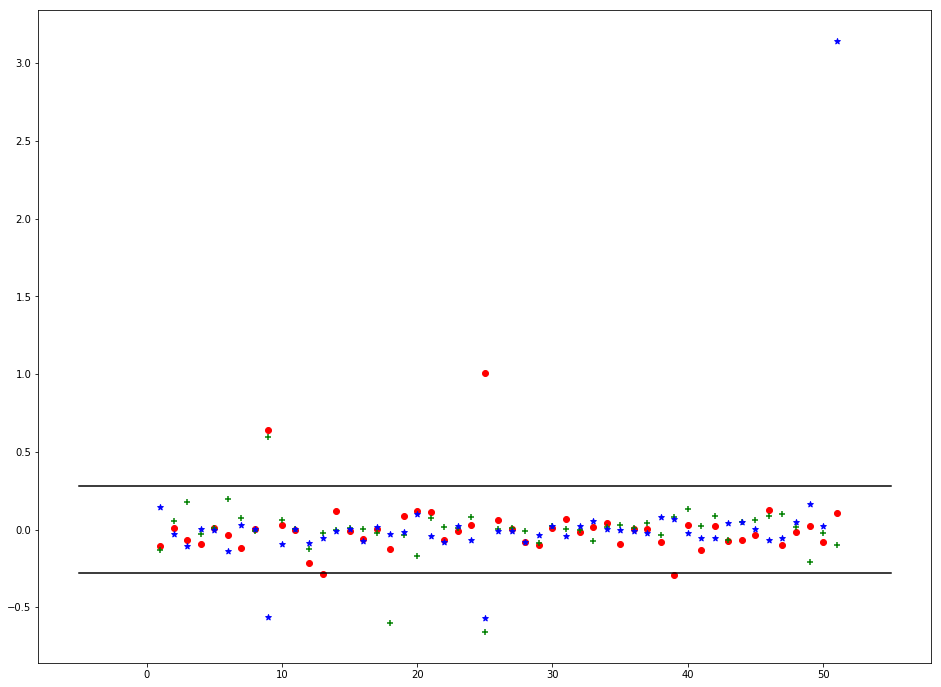

In [26]:
plt.scatter(crimedfbeta.sid, crimedfbeta.dfb_pctmetro, color = "red", marker = "o")
plt.scatter(crimedfbeta.sid, crimedfbeta.dfb_poverty, color = "green", marker = "+")
plt.scatter(crimedfbeta.sid, crimedfbeta.dfb_single, color = "blue", marker = "*")

# add a horizontial line in pyplot, using plt.plot((x1, x2), (y1, y2), 'c-')
plt.plot((-5, 55), (0.28, 0.28), 'k-')
plt.plot((-5, 55), (-0.28, -0.28), 'k-')

Finally, all the analysis showing data point with 'dc' is the most problematic observation. Let's run the regression without the 'dc' point.

In [27]:
lm_1 = smf.ols(formula = "crime ~ pctmetro + poverty + single", data = crime[crime.state != "dc"]).fit()
print (lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     82.16
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           1.03e-18
Time:                        23:19:06   Log-Likelihood:                -335.71
No. Observations:                  51   AIC:                             679.4
Df Residuals:                      47   BIC:                             687.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1666.4359    147.852    -11.271      0.0

Summary

In this section, we explored a number of methods of identifying outliers and influential points. In a typical analysis, you would probably use only some of these methods. Generally speaking, there are two types of methods for assessing outliers: statistics such as residuals, leverage, Cook's D and DFITS, that assess the overall impact of an observation on the regression results, and statistics such as DFBETA that assess the specific impact of an observation on the regression coefficients.

In our example, we found that DC was a point of major concern. We performed a regression with it and without it and the regression equations were very different. We can justify removing it from our analysis by reasoning that our model is to predict crime rate for states, not for metropolitan areas.

# 2.3 Tests for Normality of Residuals

One of the assumptions of linear regression analysis is that the residuals are normally distributed. This assumption assures that the p-values for the t-tests will be valid. As before, we will generate the residuals (called r) and predicted values (called fv) and put them in a dataset (called elem1res). We will also keep the variables api00, meals, ell and emer in that dataset.

Let's use the elemapi2 data file we saw in Chapter 1 for these analyses. Let's predict academic performance (api00) from percent receiving free meals (meals), percent of English language learners (ell), and percent of teachers with emergency credentials (emer).

In [28]:
elemapi2 = pd.read_csv(mypath + r'elemapi2.csv') 
lm = smf.ols(formula = "api00 ~ meals + ell + emer", data = elemapi2).fit()
print (lm.summary())

elem1res = pd.concat([elemapi2, pd.Series(lm.resid, name = 'resid'), pd.Series(lm.predict(), name = "predict")], axis = 1)

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     673.0
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          4.89e-155
Time:                        23:19:10   Log-Likelihood:                -2188.5
No. Observations:                 400   AIC:                             4385.
Df Residuals:                     396   BIC:                             4401.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    886.7033      6.260    141.651      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


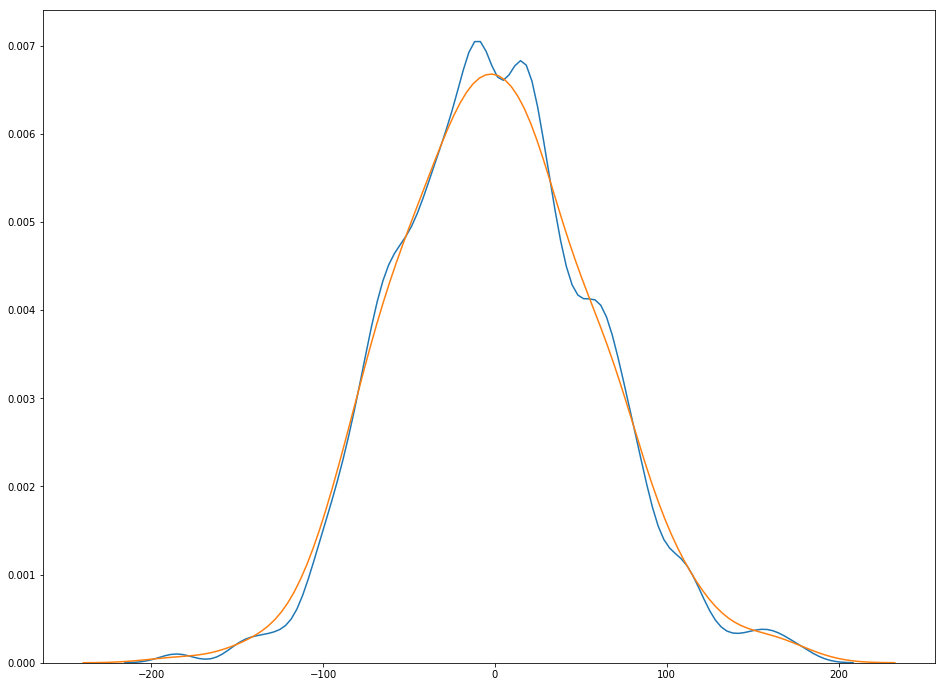

In [29]:
sns.kdeplot(np.array(elem1res.resid), bw=10)
sns.distplot(np.array(elem1res.resid), hist=False)

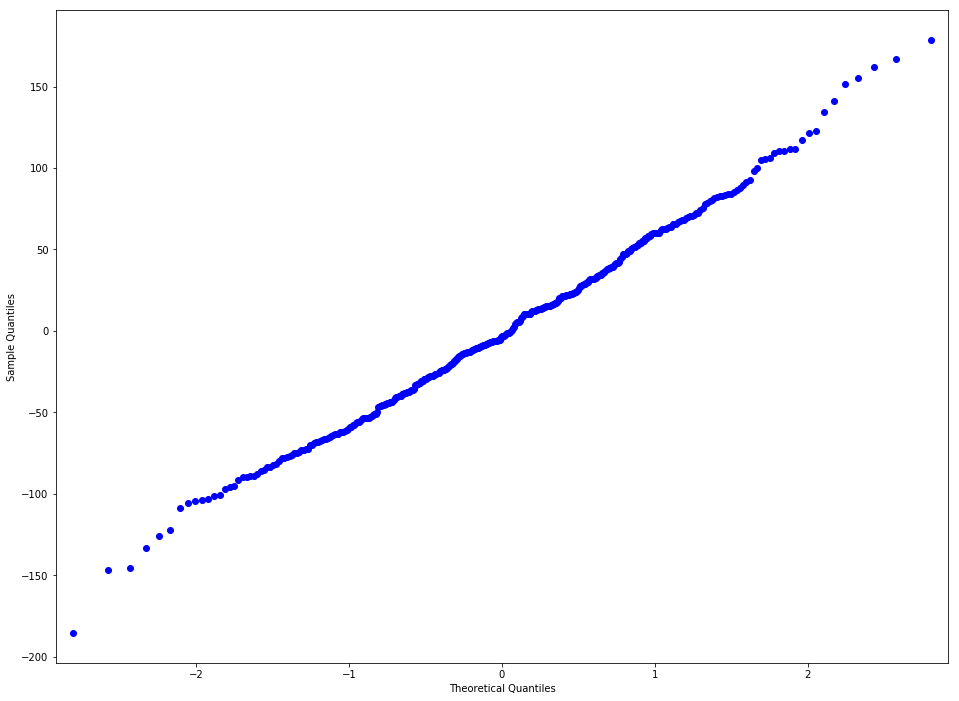

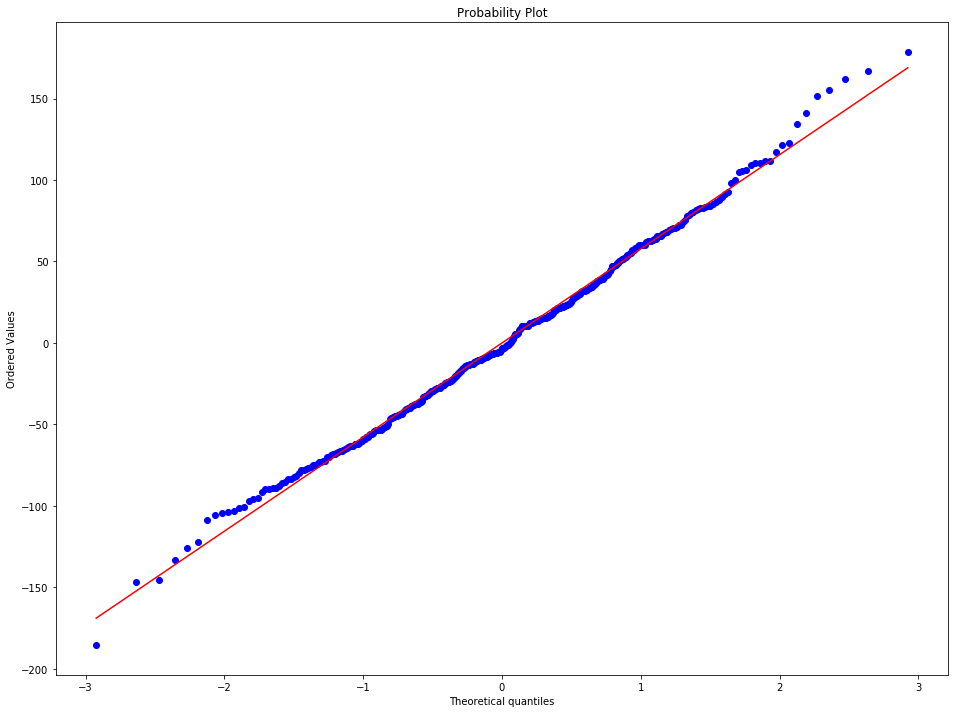

In [30]:
sm.qqplot(elem1res.resid)
plt.show()

import pylab
scipystats.probplot(elem1res.resid, dist="norm", plot=pylab)
pylab.show()

In [31]:
'''
by default, scipy stats.kstest for normal will assume mean 0 and stdev 1. To use this, the data should be normalized first
'''
resid = elem1res.resid
norm_resid = (elem1res.resid - np.mean(elem1res.resid)) / np.std(elem1res.resid)
print (scipystats.kstest(norm_resid, 'norm'))

# or use the statsmodels provided function kstest_normal to use kolmogorov-smirnov test or Anderson-Darling test
print (stats.diagnostic.kstest_normal(elem1res.resid, pvalmethod='approx'))
print (stats.diagnostic.normal_ad(elem1res.resid))

KstestResult(statistic=0.03272326181818713, pvalue=0.7850644690156735)
(0.03267621884794186, 0.2)
(0.3407124033469131, 0.49471893268937844)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


Severe outliers consist of those points that are either 3 inter-quartile-ranges below the first quartile or 3 inter-quartile-ranges above the third quartile. The presence of any severe outliers should be sufficient evidence to reject normality at a 5% significance level. Mild outliers are common in samples of any size. In our case, we don't have any severe outliers and the distribution seems fairly symmetric. The residuals have an approximately normal distribution. (See the output of the proc univariate above.)

In the Kilmogorov-Smirnov test or Anderson-Darling test for normality, the p-value is based on the assumption that the distribution is normal. In our example, the p-value is very large, indicating that we cannot reject that residuals is normally distributed.

## 2.4 Tests for Heteroscedasticity

One of the main assumptions for the ordinary least squares regression is the homogeneity of variance of the residuals. If the model is well-fitted, there should be no pattern to the residuals plotted against the fitted values. If the variance of the residuals is non-constant, then the residual variance is said to be "heteroscedastic." There are graphical and non-graphical methods for detecting heteroscedasticity. A commonly used graphical method is to plot the residuals versus fitted (predicted) values. We see that the pattern of the data points is getting a little narrower towards the right end, which is an indication of mild heteroscedasticity.

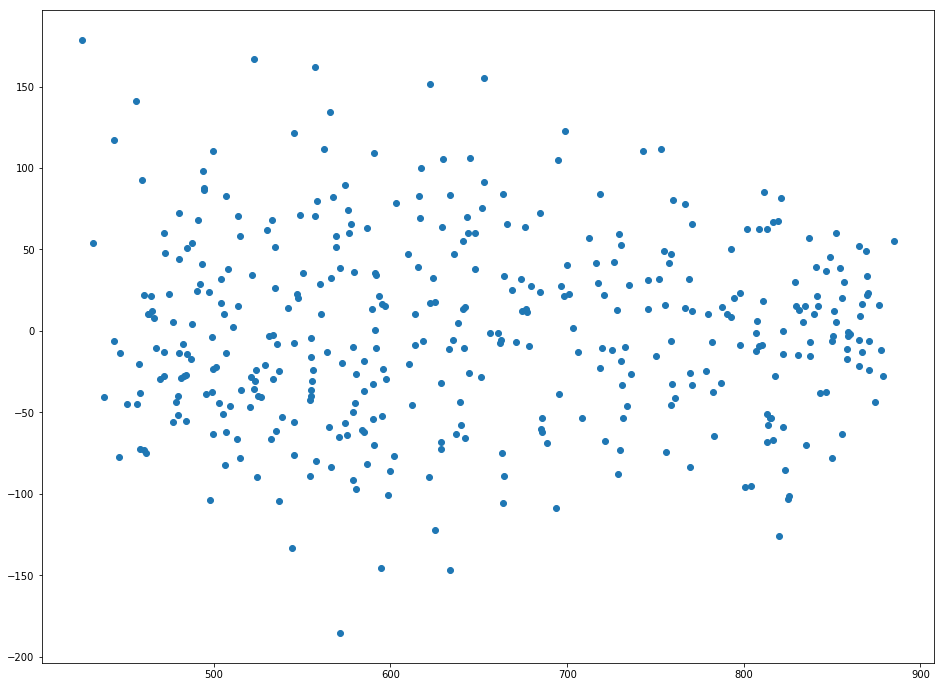

In [32]:
lm = smf.ols(formula = "api00 ~ meals + ell + emer", data = elemapi2).fit()

resid = lm.resid
plt.scatter(lm.predict(), resid)

In [33]:
# p-value here is different from SAS output, need double check
stats.diagnostic.het_white(resid, lm.model.exog, retres = False)

(18.35275573666717,
 0.03129463401079833,
 2.083825034443337,
 0.029987789753356926)

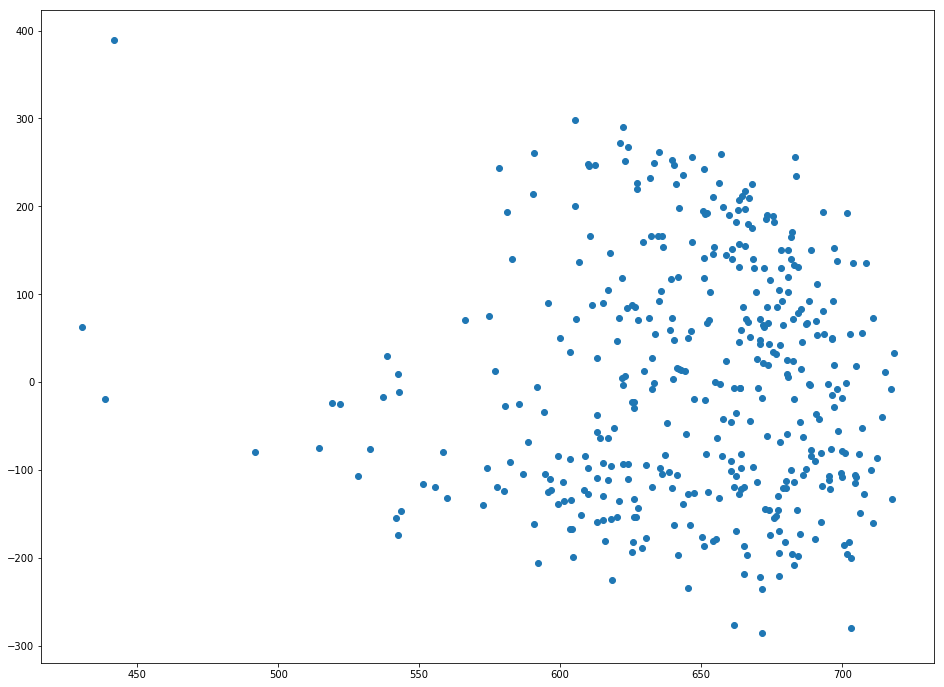

In [34]:
lm2 = smf.ols(formula = "api00 ~ enroll", data = elemapi2).fit()

plt.scatter(lm2.predict(), lm2.resid)

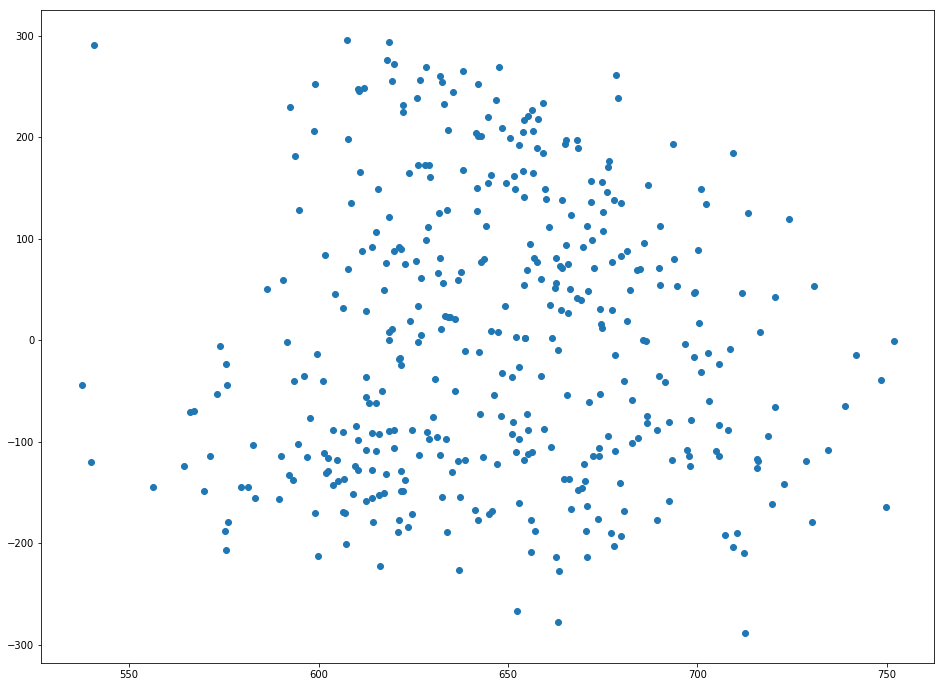

In [35]:
elemapi2['log_enroll'] = elemapi2.enroll.map(lambda x: math.log(x))
lm3 = smf.ols(formula = "api00 ~ log_enroll", data = elemapi2).fit()

plt.scatter(lm3.predict(), lm3.resid)

Finally, let's revisit the model we used at the start of this section, predicting api00 from meals, ell and emer. Using this model, the distribution of the residuals looked very nice and even across the fitted values. What if we add enroll to this model? Will this automatically ruin the distribution of the residuals? Let's add it and see.

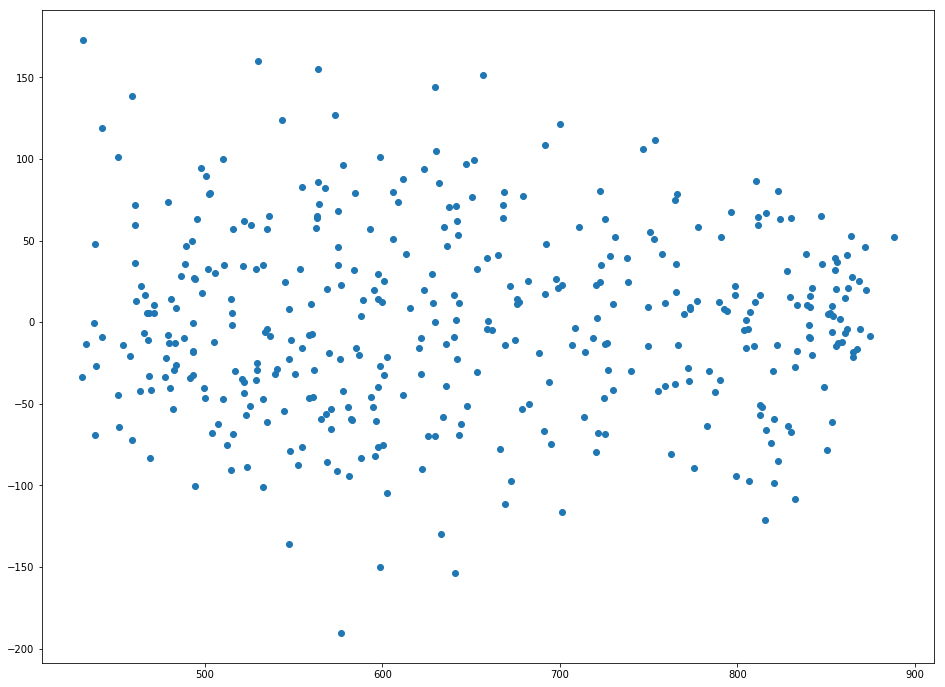

In [36]:
lm4 = smf.ols(formula = "api00 ~ meals + ell + emer + enroll", data = elemapi2).fit()

resid = lm4.resid
plt.scatter(lm4.predict(), resid)

As you can see, the distribution of the residuals looks fine, even after we added the variable enroll. When we had just the variable enroll in the model, we did a log transformation to improve the distribution of the residuals, but when enroll was part of a model with other variables, the residuals looked good enough so that no transformation was needed. This illustrates how the distribution of the residuals, not the distribution of the predictor, was the guiding factor in determining whether a transformation was needed.

## 2.5 Tests for Collinearity

When there is a perfect linear relationship among the predictors, the estimates for a regression model cannot be uniquely computed. The term collinearity describes two variables are near perfect linear combinations of one another. When more than two variables are involved, it is often called multicollinearity, although the two terms are often used interchangeably.

The primary concern is that as the degree of multicollinearity increases, the regression model estimates of the coefficients become unstable and the standard errors for the coefficients can get wildly inflated. In this section, we will explore some SAS options used with the model statement that help to detect multicollinearity.

We can use the vif option to check for multicollinearity. vif stands for variance inflation factor. As a rule of thumb, a variable whose VIF values is greater than 10 may merit further investigation. Tolerance, defined as 1/VIF, is used by many researchers to check on the degree of collinearity. A tolerance value lower than 0.1 is comparable to a VIF of 10. It means that the variable could be considered as a linear combination of other independent variables. The tol option on the model statement gives us these values. Let's first look at the regression we did from the last section, the regression model predicting api00 from meals, ell and emer, and use the vif and tol options with the model statement.

In [37]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = smf.ols(formula = "api00 ~ meals + ell + emer", data = elemapi2).fit()
y, X = dmatrices("api00 ~ meals + ell + emer", data = elemapi2, return_type = "dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print (vif)

[4.6883371380583, 2.7250555232887432, 2.5105120172587836, 1.4148169984086654]


We know the multicollinearity is caused the high correlation between the indepentent variables. So let's check the correlation between the vatiables. First we need to drop the added constant column which are all equal to 1. Then np.corrcoef or df.corr will calculate the correlation coefficient. We can also calculate the eigen value and eigen vectors of the correlation matrix to check the details.

In [38]:
corr = np.corrcoef(X.drop("Intercept", axis = 1), rowvar = 0)
print ("correlation from np.corrcoef is ") 
print (corr)

print ('\n')
print ("correlation from df.corr() is ") 
print (X.drop("Intercept", axis = 1).corr())

print ('\n')

w, v = np.linalg.eig(corr)    
print ("the eigen value of the correlation coefficient is ")
print (w)

correlation from np.corrcoef is 
[[1.         0.77237718 0.53303874]
 [0.77237718 1.         0.47217948]
 [0.53303874 0.47217948 1.        ]]


correlation from df.corr() is 
          meals       ell      emer
meals  1.000000  0.772377  0.533039
ell    0.772377  1.000000  0.472179
emer   0.533039  0.472179  1.000000


the eigen value of the correlation coefficient is 
[2.19536815 0.22351013 0.58112172]


## 2.6 Tests on Nonlinearity

When we do linear regression, we assume that the relationship between the response variable and the predictors is linear. This is the assumption of linearity. If this assumption is violated, the linear regression will try to fit a straight line to data that does not follow a straight line. Checking the linear assumption in the case of simple regression is straightforward, since we only have one predictor. All we have to do is a scatter plot between the response variable and the predictor to see if nonlinearity is present, such as a curved band or a big wave-shaped curve. For example, let us use a data file called nations.sav that has data about a number of nations around the world.

Let's look at the relationship between GNP per capita (gnpcap) and births (birth). Below if we look at the scatterplot between gnpcap and birth, we can see that the relationship between these two variables is quite non-linear. We added a regression line to the chart, and you can see how poorly the line fits this data. Also, if we look at the residuals by predicted plot, we see that the residuals are not nearly homoscedastic, due to the non-linearity in the relationship between gnpcap and birth.

                            OLS Regression Results                            
Dep. Variable:             birth_rate   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     1627.
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          3.27e-303
Time:                        23:20:00   Log-Likelihood:                -16526.
No. Observations:                4426   AIC:                         3.306e+04
Df Residuals:                    4424   BIC:                         3.307e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1892      0.194    150.844      0.0

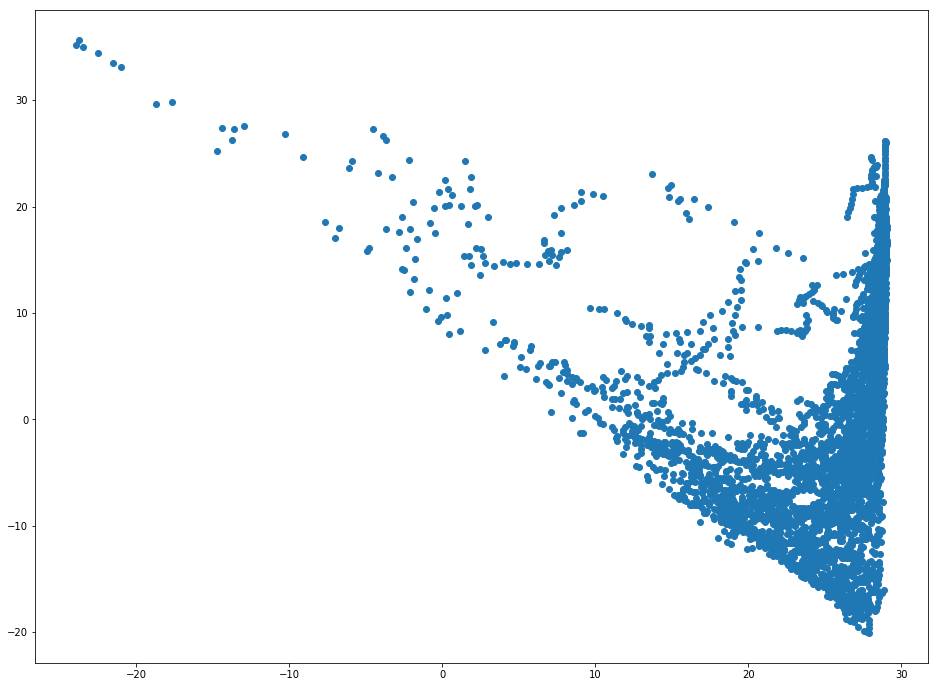

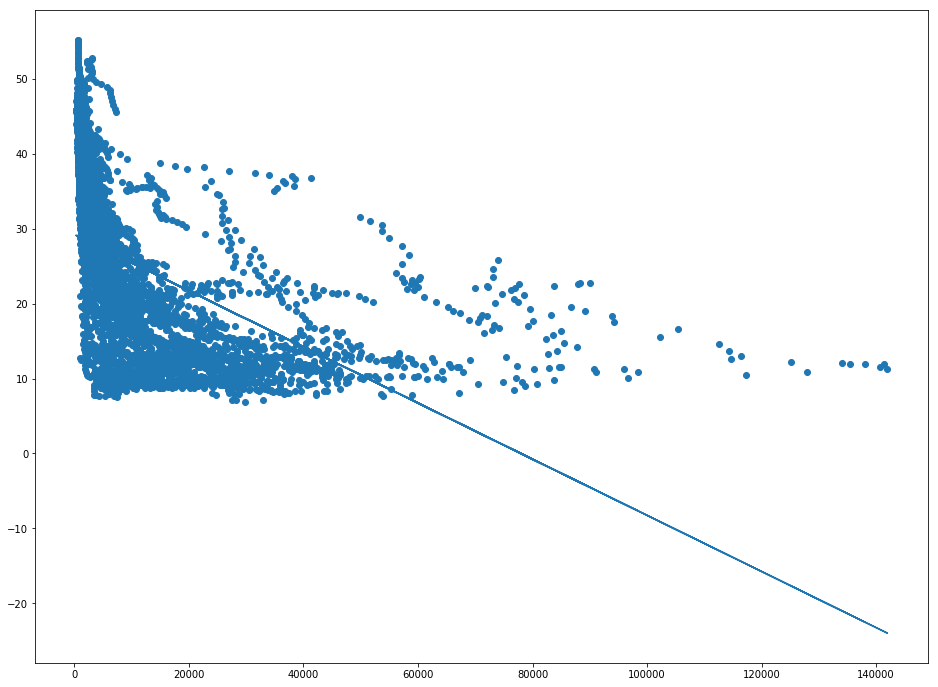

In [39]:
nations = pd.read_csv(mypath + "nations.csv")
# print nations.describe()

lm = smf.ols(formula = "birth_rate ~ gdp_percap", data = nations).fit()
print (lm.summary())

plt.scatter(lm.predict(), lm.resid)
plt.show()

plt.scatter(nations.gdp_percap, nations.birth_rate)
plt.plot(nations.gdp_percap, lm.params[0] + lm.params[1] * nations.gdp_percap, '-')
plt.show()

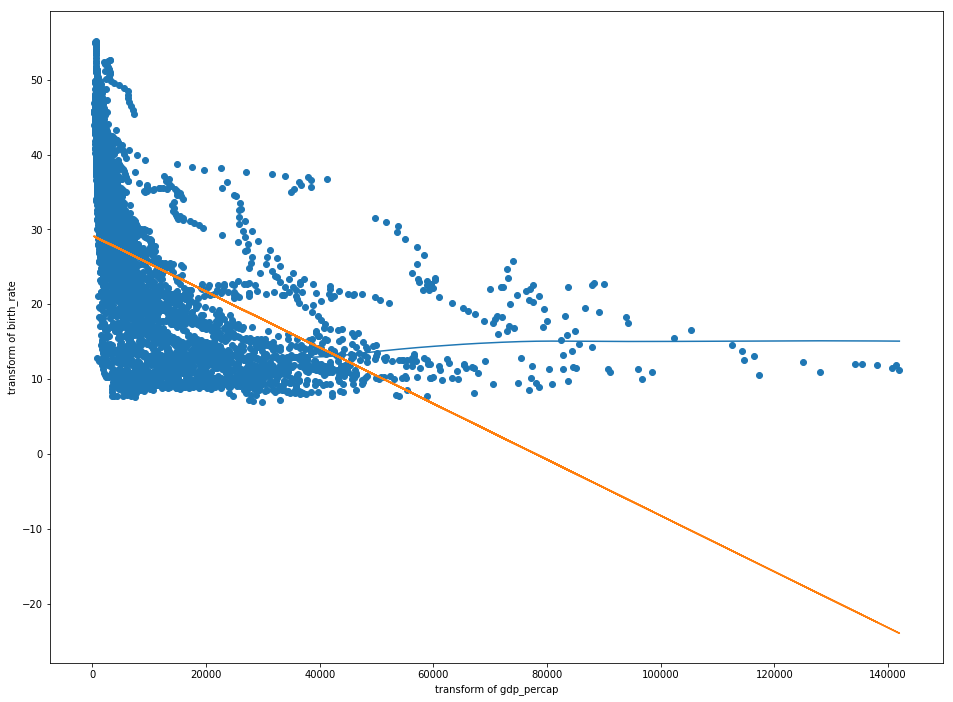

In [40]:
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_df = pd.DataFrame(lowess(endog = nations.birth_rate, exog = nations.gdp_percap, frac = 0.4), columns = ["gdp_percap", "birth_rate"])

plt.plot(lowess_df.gdp_percap, lowess_df.birth_rate)
plt.scatter(nations.gdp_percap, nations.birth_rate)
plt.plot(nations.gdp_percap, lm.params[0] + lm.params[1] * nations.gdp_percap, '-')
plt.xlabel("transform of gdp_percap")
plt.ylabel("transform of birth_rate")
plt.show()

The lowess line fits much better than the OLS linear regression. In trying to see how to remedy these, we notice that the gnpcap scores are quite skewed with most values being near 0, and a handful of values of 10,000 and higher. This suggests to us that some transformation of the variable may be useful. One of the commonly used transformations is a log transformation. Let's try it below. As you see, the scatterplot between lgnpcap and birth looks much better with the regression line going through the heart of the data. Also, the plot of the residuals by predicted values look much more reasonable.

                            OLS Regression Results                            
Dep. Variable:             birth_rate   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     7093.
Date:                Thu, 13 Dec 2018   Prob (F-statistic):               0.00
Time:                        23:20:14   Log-Likelihood:                -15102.
No. Observations:                4426   AIC:                         3.021e+04
Df Residuals:                    4424   BIC:                         3.022e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         88.6181      0.771    114.

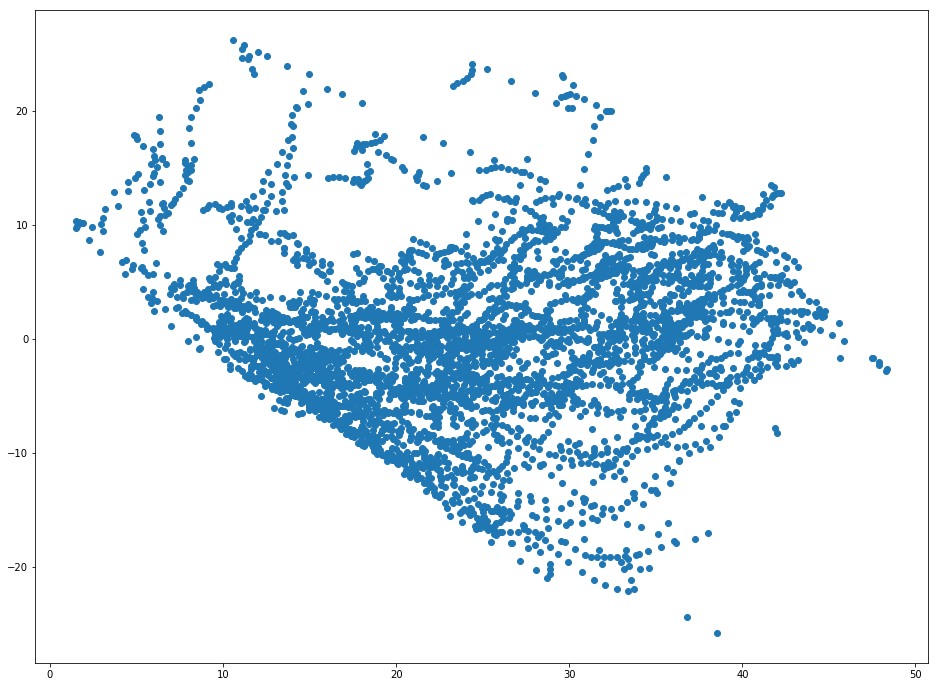

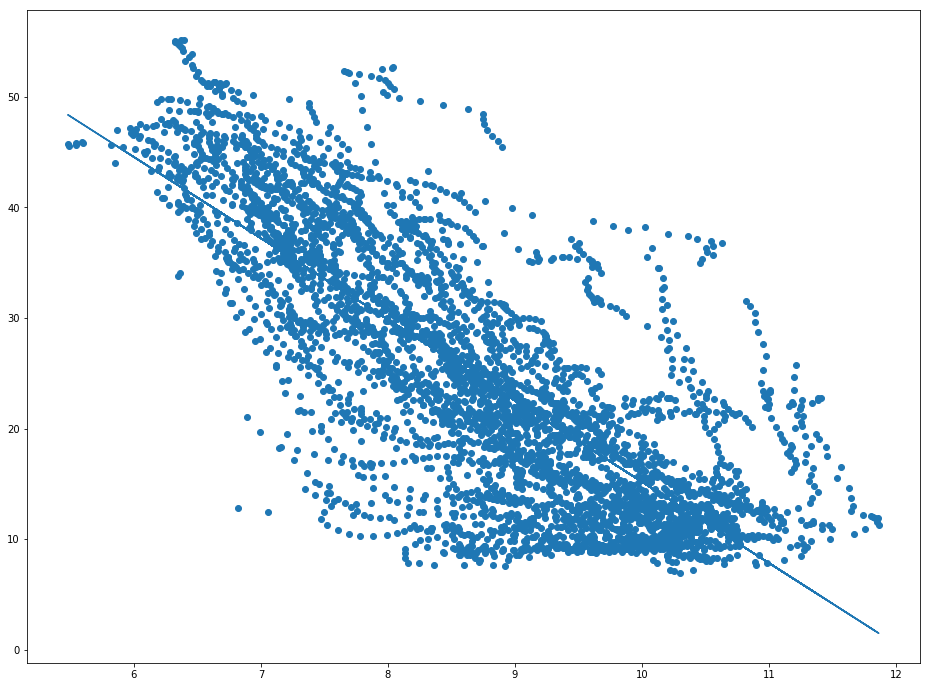

In [41]:
nations["log_gdp_percap"] = nations.gdp_percap.map(lambda x: math.log(x))
lm2 = smf.ols("birth_rate ~ log_gdp_percap", data = nations).fit()
print (lm2.summary())

plt.scatter(lm2.predict(), lm2.resid)
plt.show()

plt.scatter(nations.log_gdp_percap, nations.birth_rate)
plt.plot(nations.log_gdp_percap, lm2.params[0] + lm2.params[1] * nations.log_gdp_percap, '-')
plt.show()

This section has shown how you can use scatterplots to diagnose problems of non-linearity, both by looking at the scatterplots of the predictor and outcome variable, as well as by examining the residuals by predicted values. These examples have focused on simple regression; however, similar techniques would be useful in multiple regression. However, when using multiple regression, it would be more useful to examine partial regression plots instead of the simple scatterplots between the predictor variables and the outcome variable.

## 2.7 Model Specification

A model specification error can occur when one or more relevant variables are omitted from the model or one or more irrelevant variables are included in the model. If relevant variables are omitted from the model, the common variance they share with included variables may be wrongly attributed to those variables, and the error term is inflated. On the other hand, if irrelevant variables are included in the model, the common variance they share with included variables may be wrongly attributed to them. Model specification errors can substantially affect the estimate of regression coefficients.

Consider the model below. This regression suggests that as class size increases the academic performance increases. Before we publish results saying that increased class size is associated with higher academic performance, let's check the model specification.

In [42]:
elemapi2_0 = elemapi2[~np.isnan(elemapi2.acs_k3)]
lm = smf.ols("api00 ~ acs_k3", data = elemapi2_0).fit()
elemapi2_0.loc[:, "fv"] = lm.predict()
elemapi2_0.loc[:, "fvsquare"] = elemapi2_0.fv ** 2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


There are a couple of methods to detect specification errors. A link test performs a model specification test for single-equation models. It is based on the idea that if a regression is properly specified, one should not be able to find any additional independent variables that are significant except by chance. To conduct this test, you need to obtain the fitted values from your regression and the squares of those values. The model is then refit using these two variables as predictors. The fitted value should be significant because it is the predicted value. One the other hand, the fitted values squared shouldn't be significant, because if our model is specified correctly, the squared predictions should not have much of explanatory power. That is, we wouldn't expect the fitted value squared to be a significant predictor if our model is specified correctly. So we will be looking at the p-value for the fitted value squared.

In [43]:
lm = smf.ols("api00 ~ fv + fvsquare", data = elemapi2_0).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     7.089
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           0.000944
Time:                        23:20:29   Log-Likelihood:                -2529.9
No. Observations:                 398   AIC:                             5066.
Df Residuals:                     395   BIC:                             5078.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3884.5065   2617.696      1.484      0.1

Let's try adding one more variable, meals, to the above model and then run the link test again.

In [44]:
lm = smf.ols("api00 ~ acs_k3 + full + fv", data = elemapi2_0).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           3.29e-36
Time:                        23:20:32   Log-Likelihood:                -2454.6
No. Observations:                 398   AIC:                             4915.
Df Residuals:                     395   BIC:                             4927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3727      0.515     -0.724      0.4

The link test is once again non-significant. Note that after including meals and full, the coefficient for class size is no longer significant. While acs_k3 does have a positive relationship with api00 when no other variables are in the model, when we include, and hence control for, other important variables, acs_k3 is no longer significantly related to api00 and its relationship to api00 is no longer positive.

## 2.8 Issues of Independence

The statement of this assumption is that the errors associated with one observation are not correlated with the errors of any other observation cover several different situations. Consider the case of collecting data from students in eight different elementary schools. It is likely that the students within each school will tend to be more like one another that students from different schools, that is, their errors are not independent. We will deal with this type of situation in Chapter 4.

Another way in which the assumption of independence can be broken is when data are collected on the same variables over time. Let's say that we collect truancy data every semester for 12 years. In this situation it is likely that the errors for observation between adjacent semesters will be more highly correlated than for observations more separated in time. This is known as autocorrelation. When you have data that can be considered to be time-series, you should use the dw option that performs a Durbin-Watson test for correlated residuals.

We don't have any time-series data, so we will use the elemapi2 dataset and pretend that snum indicates the time at which the data were collected. We will sort the data on snum to order the data according to our fake time variable and then we can run the regression analysis with the dw option to request the Durbin-Watson test. The Durbin-Watson statistic has a range from 0 to 4 with a midpoint of 2. The observed value in our example is less than 2, which is not surprising since our data are not truly time-series.

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     44.83
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           7.34e-11
Time:                        23:20:36   Log-Likelihood:                -2528.8
No. Observations:                 400   AIC:                             5062.
Df Residuals:                     398   BIC:                             5070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    744.2514     15.933     46.711      0.0

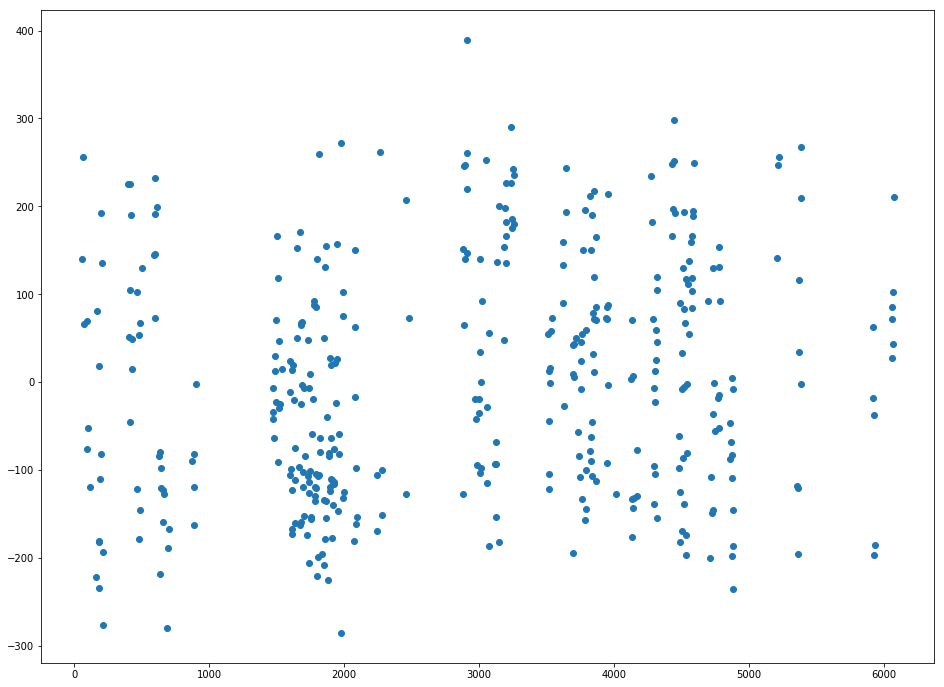

In [45]:
lm = smf.ols(formula = "api00 ~ enroll", data = elemapi2).fit()
print (lm.summary())
print ("Durbin-Watson test statistics is " + str(stools.durbin_watson(lm.resid)))

plt.scatter(elemapi2.snum, lm.resid)
plt.show()

In [1]:
'''
http://songhuiming.github.io/pages/2017/01/21/linear-regression-in-python-chapter-3-regression-with-categorical-predictors/
'''

'\nhttp://songhuiming.github.io/pages/2017/01/21/linear-regression-in-python-chapter-3-regression-with-categorical-predictors/\n'

# 3. Regression with Categorical Predictors

## 3.1 Introduction

In the previous two chapters, we have focused on regression analyses using continuous variables. However, it is possible to include categorical predictors in a regression analysis, but it requires some extra work in performing the analysis and extra work in properly interpreting the results. This chapter will illustrate how you can use Python for including categorical predictors in your analysis and describe how to interpret the results of such analyses.

This chapter will use the elemapi2 data that you have seen in the prior chapters. We will focus on four variables api00, some_col, yr_rnd and mealcat, which takes meals and breaks it up into three categories. Let's have a quick look at these variables.

In [51]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
import math
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

mypath =  r'E:/python/Dataset/'

elemapi2 = pd.read_csv(mypath + r'elemapi2.csv')   
elemapi2_sel = elemapi2.ix[:, ["api00", "some_col", "yr_rnd", "mealcat"]]
print (elemapi2_sel.describe())

def cv_desc(df, var):
    return df[var].value_counts(dropna = False)

print ('\n')  
print (cv_desc(elemapi2_sel, 'mealcat'))
print ('\n')  
print (cv_desc(elemapi2_sel, 'yr_rnd'))

            api00    some_col     yr_rnd     mealcat
count  400.000000  400.000000  400.00000  400.000000
mean   647.622500   19.712500    0.23000    2.015000
std    142.248961   11.336938    0.42136    0.819423
min    369.000000    0.000000    0.00000    1.000000
25%    523.750000   12.000000    0.00000    1.000000
50%    643.000000   19.000000    0.00000    2.000000
75%    762.250000   28.000000    0.00000    3.000000
max    940.000000   67.000000    1.00000    3.000000


3    137
2    132
1    131
Name: mealcat, dtype: int64


0    308
1     92
Name: yr_rnd, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


The variable api00 is a measure of the performance of the students. The variable some_col is a continuous variable that measures the percentage of the parents in the school who have attended college. The variable yr_rnd is a categorical variable that is coded 0 if the school is not year round, and 1 if year round. The variable meals is the percentage of students who are receiving state sponsored free meals and can be used as an indicator of poverty. This was broken into 3 categories (to make equally sized groups) creating the variable mealcat. The following macro function created for this dataset gives us codebook type information on a variable that we specify. It gives the information of the number of unique values that a variable take.

In [53]:
def codebook(df, var):
    title = "Codebook for " + str(var)
    unique_values = len(df[var].unique())
    max_v = df[var].max()
    min_v = df[var].min()
    n_miss = sum(pd.isnull(df[var]))
    mean = df[var].mean()
    stdev = df[var].std()
    print (pd.DataFrame({'title': title, 'unique values': unique_values, 'max value' : max_v, 'min value': min_v, 'num of missing' : n_miss, 'mean' : mean, 'stdev' : stdev}, index = [0]))
    return

codebook(elemapi2_sel, 'api00')

   max value      mean  min value  num of missing       stdev  \
0        940  647.6225        369               0  142.248961   

                title  unique values  
0  Codebook for api00            271  


## 3.2 Regression with a 0/1 variable

The simplest example of a categorical predictor in a regression analysis is a 0/1 variable, also called a dummy variable or sometimes an indicator variable. Let's use the variable yr_rnd as an example of a dummy variable. We can include a dummy variable as a predictor in a regression analysis as shown below.

In [54]:
reg = smf.ols(formula = "api00 ~ yr_rnd", data = elemapi2_sel).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     116.2
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           5.96e-24
Time:                        23:30:09   Log-Likelihood:                -2498.9
No. Observations:                 400   AIC:                             5002.
Df Residuals:                     398   BIC:                             5010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    684.5390      7.140     95.878      0.000     670.503     698.575
yr_rnd      -160.5064     14.887    -10.782      0.000    -189.774    -131.239
==============================================================================
Omnibus:                       45.748   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.162
Skew:                           0.006   Prob(JB):                      0.00139
Kurtosis:                       2.111   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This may seem odd at first, but this is a legitimate analysis. But what does this mean? Let's go back to basics and write out the regression equation that this model implies.

api00 = Intercept + Byr_rnd * yr_rnd

where Intercept is the intercept (or constant) and we use Byr_rnd to represent the coefficient for variable yr_rnd. Filling in the values from the regression equation, we get

api00 = 684.539 + -160.5064 * yr_rnd

If a school is not a year-round school (i.e., yr_rnd is 0) the regression equation would simplify to

api00 = constant    + 0 * Byr_rnd

api00 = 684.539     + 0 * -160.5064  

api00 = 684.539

If a school is a year-round school, the regression equation would simplify to

api00 = constant + 1 * Byr_rnd

api00 = 684.539  + 1 * -160.5064

api00 = 524.0326

We can graph the observed values and the predicted values as shown below. Although yr_rnd only has two values, we can still draw a regression line showing the relationship between yr_rnd and api00. Based on the results above, we see that the predicted value for non-year round schools is 684.539 and the predicted value for the year round schools is 524.032, and the slope of the line is negative, which makes sense since the coefficient for yr_rnd was negative (-160.5064).

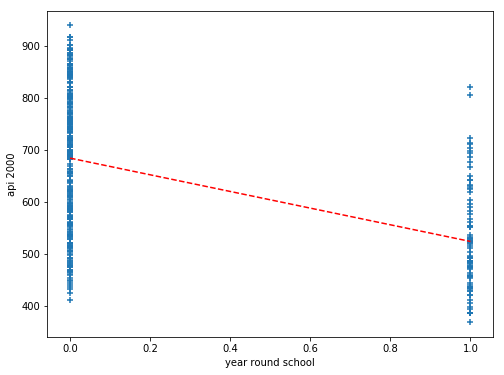

In [56]:
plt.scatter(elemapi2_sel.yr_rnd, elemapi2_sel.api00, marker = "+")
plt.plot([0, 1], [np.mean(elemapi2_sel.query('yr_rnd == 0').api00), np.mean(elemapi2_sel.query('yr_rnd == 1').api00)], 'r--')
plt.ylabel("api 2000")
plt.xlabel("year round school")
plt.show()

Let's compare these predicted values to the mean api00 scores for the year-round and non-year-round students. Let's create a format for variable yr_rnd and mealcat so we can label these categorical variables. Notice that we use the format statement in groupby aggregate mean below to show value labels for variable yr_rnd.

In [57]:
elemapi2_sel["yr_rnd_c"] = elemapi2_sel.yr_rnd.map({0: "No", 1: "Yes"})
elemapi2_sel["mealcat_c"] = elemapi2_sel.mealcat.map({1: "0-46% free meals", 2: "47-80% free meals", 3: "1-100% free meals"})

elemapi2_sel_group = elemapi2_sel.groupby("yr_rnd_c")
elemapi2_sel_group.api00.agg([np.mean, np.std])

,mean,std
yr_rnd_c,,
No,684.538961,132.112534
Yes,524.032609,98.916043


As you see, the regression equation predicts that for a school, the value of api00 will be the mean value of the group determined by the school type.

Let's relate these predicted values back to the regression equation. For the non-year-round schools, their mean is the same as the intercept (684.539). The coefficient for yr_rnd is the amount we need to add to get the mean for the year-round schools, i.e., we need to add -160.5064 to get 524.0326, the mean for the non year-round schools. In other words, Byr_rnd is the mean api00 score for the year-round schools minus the mean api00 score for the non year-round schools, i.e., mean(year-round) - mean(non year-round).

It may be surprising to note that this regression analysis with a single dummy variable is the same as doing a t-test comparing the mean api00 for the year-round schools with the non year-round schools (see below). You can see that the t value below is the same as the t value for yr_rnd in the regression above. This is because Byr_rnd compares the year-rounds and non year-rounds (since the coefficient is mean(year round)-mean(non year-round)).

In [58]:
# pooled ttest, assume equal population variance
print (scipystats.ttest_ind(elemapi2_sel.query('yr_rnd == 0').api00, elemapi2_sel.query('yr_rnd == 1').api00))

# does not assume equal variance
print (scipystats.ttest_ind(elemapi2_sel.query('yr_rnd == 0').api00, elemapi2_sel.query('yr_rnd == 1').api00, equal_var = False))

Ttest_indResult(statistic=10.781500136400451, pvalue=5.9647081127888056e-24)
Ttest_indResult(statistic=12.57105956566846, pvalue=5.29731480664924e-27)


Since a t-test is the same as doing an anova, we can get the same results using anova as well.

In [59]:
print (scipystats.f_oneway(elemapi2_sel.query('yr_rnd == 0').api00, elemapi2_sel.query('yr_rnd == 1').api00))

F_onewayResult(statistic=116.2407451912029, pvalue=5.964708112790799e-24)


If we square the t-value from the t-test, we get the same value as the F-value from anova: 10.78^2=116.21 (with a little rounding error.)

## 3.3 Regression with a 1/2 variable

A categorical predictor variable does not have to be coded 0/1 to be used in a regression model. It is easier to understand and interpret the results from a model with dummy variables, but the results from a variable coded 1/2 yield essentially the same results.

Lets make a copy of the variable yr_rnd called yr_rnd2 that is coded 1/2, 1=non year-round and 2=year-round.

In [60]:
elemapi2_sel["yr_rnd2"] = elemapi2_sel["yr_rnd"] + 1
reg = smf.ols("api00 ~ yr_rnd2", data = elemapi2_sel).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     116.2
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           5.96e-24
Time:                        23:39:17   Log-Likelihood:                -2498.9
No. Observations:                 400   AIC:                             5002.
Df Residuals:                     398   BIC:                             5010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    845.0453     19.353     43.664      0.000     806.998     883.093
yr_rnd2     -160.5064     14.887    -10.782      0.000    -189.774    -131.239
==============================================================================
Omnibus:                       45.748   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.162
Skew:                           0.006   Prob(JB):                      0.00139
Kurtosis:                       2.111   Cond. No.                         6.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that the coefficient for yr_rnd is the same as yr_rnd2. So, you can see that if you code yr_rnd as 0/1 or as 1/2, the regression coefficient works out to be the same. However the intercept (Intercept) is a bit less intuitive. When we used yr_rnd, the intercept was the mean for the non year-rounds. When using yr_rnd2, the intercept is the mean for the non year-rounds minus Byr_rnd2, i.e., 684.539 - (-160.506) = 845.045

Note that you can use 0/1 or 1/2 coding and the results for the coefficient come out the same, but the interpretation of constant in the regression equation is different. It is often easier to interpret the estimates for 0/1 coding.

In summary, these results indicate that the api00 scores are significantly different for the schools depending on the type of school, year round school versus non-year round school. Non year-round schools have significantly higher API scores than year-round schools. Based on the regression results, non year-round schools have scores that are 160.5 points higher than year-round schools.

### 3.4 Regression with a 1/2/3 variable 

### 3.4.1 Manually creating dummy variables

Say, that we would like to examine the relationship between the amount of poverty and api scores. We don't have a measure of poverty, but we can use mealcat as a proxy for a measure of poverty. From the previous section, we have seen that variable mealcat has three unique values. These are the levels of percent of students on free meals. We can associate a value label to variable mealcat to make it more meaningful for us when we run python regression with mealcat.

In [61]:
elemapi2_sel_group = elemapi2_sel.groupby("mealcat_c")
elemapi2_sel_group.api00.agg([lambda x: x.shape[0], np.mean, np.std])

,<lambda>,mean,std
mealcat_c,,,
0-46% free meals,131,805.717557,65.668664
1-100% free meals,137,504.379562,62.727015
47-80% free meals,132,639.393939,82.135130


In [62]:
lm = smf.ols('api00 ~ mealcat', data = elemapi2_sel).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     1208.
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          1.29e-122
Time:                        23:41:19   Log-Likelihood:                -2271.1
No. Observations:                 400   AIC:                             4546.
Df Residuals:                     398   BIC:                             4554.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    950.9874      9.422    100.935      0.000     932.465     969.510
mealcat     -150.5533      4.332    -34.753      0.000    -159.070    -142.037
==============================================================================
Omnibus:                        3.106   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                3.112
Skew:                          -0.214   Prob(JB):                        0.211
Kurtosis:                       2.943   Cond. No.                         6.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is looking at the linear effect of mealcat with api00, but mealcat is not an interval variable. Instead, you will want to code the variable so that all the information concerning the three levels is accounted for. In general, we need to go through a data step to create dummy variables. For example, in order to create dummy variables for mealcat, we can do the following using sklearn to create dummy variables.

In [63]:
from sklearn import preprocessing
le_mealcat = preprocessing.LabelEncoder()
elemapi2_sel['mealcat_dummy'] = le_mealcat.fit_transform(elemapi2_sel.mealcat)

elemapi2_sel.groupby('mealcat_dummy').size()


ohe = preprocessing.OneHotEncoder()
dummy = pd.DataFrame(ohe.fit_transform(elemapi2_sel.mealcat.reshape(-1,1)).toarray(), columns = ["mealcat1", "mealcat2", "mealcat3"])
elemapi2_sel = pd.concat([elemapi2_sel, dummy], axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [64]:
lm = smf.ols('api00 ~ mealcat2 + mealcat3', data = elemapi2_sel).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     611.1
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          6.48e-122
Time:                        23:42:19   Log-Likelihood:                -2269.0
No. Observations:                 400   AIC:                             4544.
Df Residuals:                     397   BIC:                             4556.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    805.7176      6.169    130.599      0.000     793.589     817.846
mealcat2    -166.3236      8.708    -19.099      0.000    -183.444    -149.203
mealcat3    -301.3380      8.629    -34.922      0.000    -318.302    -284.374
==============================================================================
Omnibus:                        1.593   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.684
Skew:                          -0.139   Prob(JB):                        0.431
Kurtosis:                       2.847   Cond. No.                         3.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The interpretation of the coefficients is much like that for the binary variables. Group 1 is the omitted group, so Intercept is the mean for group 1. The coefficient for mealcat2 is the mean for group 2 minus the mean of the omitted group (group 1). And the coefficient for mealcat3 is the mean of group 3 minus the mean of group 1. You can verify this by comparing the coefficients with the means of the groups.

In [65]:
elemapi2_sel.groupby("mealcat").api00.mean()

mealcat
1    805.717557
2    639.393939
3    504.379562
Name: api00, dtype: float64

Based on these results, we can say that the three groups differ in their api00 scores, and that in particular group 2 is significantly different from group1 (because mealcat2 was significant) and group 3 is significantly different from group 1 (because mealcat3 was significant).

### 3.4.2 run regression with categorical variable directly

In [66]:
lm = lm = smf.ols('api00 ~ C(mealcat)', data = elemapi2_sel).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     611.1
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          6.48e-122
Time:                        23:48:15   Log-Likelihood:                -2269.0
No. Observations:                 400   AIC:                             4544.
Df Residuals:                     397   BIC:                             4556.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         805.7176      6.169    130.599      0.000     793.589     817.846
C(mealcat)[T.2]  -166.3236      8.708    -19.099      0.000    -183.444    -149.203
C(mealcat)[T.3]  -301.3380      8.629    -34.922      0.000    -318.302    -284.374
==============================================================================
Omnibus:                        1.593   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.684
Skew:                          -0.139   Prob(JB):                        0.431
Kurtosis:                       2.847   Cond. No.                         3.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.4.3 Other coding schemes

It is generally very convenient to use dummy coding but it is not the only kind of coding that can be used. As you have seen, when you use dummy coding one of the groups becomes the reference group and all of the other groups are compared to that group. This may not be the most interesting set of comparisons.

Say you want to compare group 1 with 2, and group 2 with group 3. You need to generate a coding scheme that forms these 2 comparisons. In python, we can first generate the corresponding coding scheme in a data step shown below and use them in the regression.

We create two dummy variables, one for group 1 and the other for group 3.

In [67]:
elemapi2_sel = elemapi2.ix[:, ["api00", "some_col", "yr_rnd", "mealcat"]]

elemapi2_sel["mealcat1"] = np.where(elemapi2_sel.mealcat == 1, 2.0 / 3, -1.0/3)
elemapi2_sel["mealcat2"] = np.where(elemapi2_sel.mealcat == 2, 2.0 / 3, -1.0/3)
elemapi2_sel["mealcat3"] = np.where(elemapi2_sel.mealcat == 3, 2.0 / 3, -1.0/3)

elemapi2_sel.groupby(["mealcat", "mealcat1",  "mealcat3"]).size()

mealcat  mealcat1   mealcat3 
1         0.666667  -0.333333    131
2        -0.333333  -0.333333    132
3        -0.333333   0.666667    137
dtype: int64

In [68]:
lm = lm = smf.ols('api00 ~ mealcat1 + mealcat3', data = elemapi2_sel).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     611.1
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          6.48e-122
Time:                        23:49:39   Log-Likelihood:                -2269.0
No. Observations:                 400   AIC:                             4544.
Df Residuals:                     397   BIC:                             4556.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    649.8304      3.531    184.021      0.000     642.888     656.773
mealcat1     166.3236      8.708     19.099      0.000     149.203     183.444
mealcat3    -135.0144      8.612    -15.677      0.000    -151.945    -118.083
==============================================================================
Omnibus:                        1.593   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.684
Skew:                          -0.139   Prob(JB):                        0.431
Kurtosis:                       2.847   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If you compare the parameter estimates with the group means of mealcat you can verify that B1 (i.e. 0-46% free meals) is the mean of group 1 minus group 2, and B2 (i.e., 47-80% free meals) is the mean of group 2 minus group 3. Both of these comparisons are significant, indicating that group 1 significantly differs from group 2, and group 2 significantly differs from group 3.

And the value of the intercept term Intercept is the unweighted average of the means of the three groups, (805.71756 +639.39394 +504.37956)/3 = 649.83035.

## 3.5 Regression with two categorical predictors

### 3.5.1 Manually creating dummy variables

Previously we looked at using yr_rnd to predict api00 and we have also looked at using mealcat to predict api00. Let's include the parameter estimates for each model below.

In [70]:
lm = smf.ols('api00 ~ yr_rnd', data = elemapi2_sel).fit()
print (lm.summary())

print ('\n')

lm = smf.ols('api00 ~ mealcat1 + mealcat2', data = elemapi2_sel).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     116.2
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           5.96e-24
Time:                        23:52:07   Log-Likelihood:                -2498.9
No. Observations:                 400   AIC:                             5002.
Df Residuals:                     398   BIC:                             5010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    684.5390      7.140     95.878      0.0

In the first model with only yr_rnd as the only predictor, the intercept term is the mean api score for the non-year-round schools. The coefficient for yr_rnd is the difference between the year round and non-year round group. In the second model, the coefficient for mealcat1 is the difference between mealcat=1 and mealcat=3, and the coefficient for mealcat2 is the difference between mealcat=2 and mealcat=3. The intercept is the mean for the mealcat=3.

Of course, we can include both yr_rnd and mealcat together in the same model. Now the question is how to interpret the coefficients.

In [71]:
lm = smf.ols('api00 ~ yr_rnd + mealcat1 + mealcat2', data = elemapi2_sel).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     435.0
Date:                Thu, 13 Dec 2018   Prob (F-statistic):          6.40e-125
Time:                        23:53:24   Log-Likelihood:                -2258.6
No. Observations:                 400   AIC:                             4525.
Df Residuals:                     396   BIC:                             4541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    659.5396      4.043    163.126      0.0

Let's dig below the surface and see how the coefficients relate to the predicted values. Let's view the cells formed by crossing yr_rnd and mealcat and number the cells from cell1 to cell6.

| Variable  | mealcat=1| mealcat=2| mealcat=3|
|-----------|----------|----------|----------|
| yr_rnd=0  | cell1    | cell2    | cell3    |
| yr_rnd=1  | cell4    | cell5    | cell6    |

With respect to mealcat, the group mealcat=3 is the reference category, and with respect to yr_rnd the group yr_rnd=0 is the reference category. As a result, cell3 is the reference cell. The intercept is the predicted value for this cell.

The coefficient for yr_rnd is the difference between cell3 and cell6. Since this model has only main effects, it is also the difference between cell2 and cell5, or from cell1 and cell4. In other words, Byr_rnd is the amount you add to the predicted value when you go from non-year round to year round schools.

The coefficient for mealcat1 is the predicted difference between cell1 and cell3. Since this model only has main effects, it is also the predicted difference between cell4 and cell6. Likewise, Bmealcat2 is the predicted difference between cell2 and cell3, and also the predicted difference between cell5 and cell6.

So, the predicted values, in terms of the coefficients, would be

| Variable  | mealcat=1                        | mealcat=2                          | mealcat=3             |
|-----------|----------------------------------|------------------------------------|-----------------------|
| yr_rnd=0  |Intercept + Bmealcat1             |Intercept + Bmealcat2               | Intercept             |
| yr_rnd=1  |Intercept + Byr_rnd + Bmealcat1   | Intercept + Byr_rnd + Bmealcat2    | Intercept + Byr_rnd   |

We should note that if you computed the predicted values for each cell, they would not exactly match the means in the six cells. The predicted means would be close to the observed means in the cells, but not exactly the same. This is because our model only has main effects and assumes that the difference between cell1 and cell4 is exactly the same as the difference between cells 2 and 5 which is the same as the difference between cells 3 and 5. Since the observed values don't follow this pattern, there is some discrepancy between the predicted means and observed means.

### 3.5.2 Using the C formula directly

We can run the same analysis using the categorical formula without manually coding the dummy variables.

In [75]:
lm = smf.ols('api00 ~ yr_rnd + C(mealcat)', data = elemapi2_sel).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     435.0
Date:                Fri, 14 Dec 2018   Prob (F-statistic):          6.40e-125
Time:                        00:10:05   Log-Likelihood:                -2258.6
No. Observations:                 400   AIC:                             4525.
Df Residuals:                     396   BIC:                             4541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         808.0131      6.040    1

In summary, these results indicate the differences between year round and non-year round schools is significant, and the differences among the three mealcat groups are significant.

## 3.6 Categorical predictor with interactions

### 3.6.1 Manually creating dummy variables

Let's perform the same analysis that we performed above, this time let's include the interaction of mealcat by yr_rnd. In this section we show how to do it by manually creating all the dummy variables. We use the array structure again. This time we have to declare two set of arrays, one for the dummy variables of mealcat and one for the interaction of yr_rnd and mealcat.

In [76]:
elemapi2_sel = elemapi2.ix[:, ["api00", "some_col", "yr_rnd", "mealcat"]]

ohe = preprocessing.OneHotEncoder()
dummy = pd.DataFrame(ohe.fit_transform(elemapi2_sel.mealcat.reshape(-1,1)).toarray(), columns = ["mealcat1", "mealcat2", "mealcat3"])
mealxynd = np.multiply(dummy, elemapi2.yr_rnd.reshape(-1, 1))
mealxynd.columns = ["mealxynd1", "mealxynd2", "mealxynd3"]
elemapi2_sel = pd.concat([elemapi2_sel, dummy, mealxynd], axis = 1)

elemapi2_sel.groupby(["yr_rnd", "mealcat", "mealxynd1", "mealxynd2", "mealxynd3"]).size()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


yr_rnd  mealcat  mealxynd1  mealxynd2  mealxynd3
0       1        0.0        0.0        0.0          124
        2        0.0        0.0        0.0          117
        3        0.0        0.0        0.0           67
1       1        1.0        0.0        0.0            7
        2        0.0        1.0        0.0           15
        3        0.0        0.0        1.0           70
dtype: int64

Now let's add these dummy variables for interaction between yr_rnd and mealcat to our model. We can all add a test statement to test the overall interaction. The output shows that the interaction effect is not significant.

In [78]:
lm = smf.ols('api00 ~ yr_rnd + mealcat1 + mealcat2 + mealxynd1 + mealxynd2', data = elemapi2_sel).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     261.6
Date:                Fri, 14 Dec 2018   Prob (F-statistic):          9.19e-123
Time:                        00:13:06   Log-Likelihood:                -2257.5
No. Observations:                 400   AIC:                             4527.
Df Residuals:                     394   BIC:                             4551.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    521.4925      8.414     61.978      0.0

It is important to note how the meaning of the coefficients change in the presence of these interaction terms. For example, in the prior model, with only main effects, we could interpret Byr_rnd as the difference between the year round and non year round schools. However, now that we have added the interaction term, the term Byr_rnd represents the difference between cell3 and cell6, or the difference between the year round and non-year round schools when mealcat=3 (because mealcat=3 was the omitted group). The presence of an interaction would imply that the difference between year round and non-year round schools depends on the level of mealcat. The interaction terms Bmealxynd1 and Bmealxynd2 represent the extent to which the difference between the year round/non year round schools changes when mealcat=1 and when mealcat=2 (as compared to the reference group, mealcat=3). For example the term Bmealxynd1 represents the difference between year round and non-year round for mealcat=1 versus the difference for mealcat=3. In other words, Bmealxynd1 in this design is (cell1-cell4) - (cell3-cell6), or it represents how much the effect of yr_rnd differs between mealcat=1 and mealcat=3.

Below we have shown the predicted values for the six cells in terms of the coefficients in the model. If you compare this to the main effects model, you will see that the predicted values are the same except for the addition of mealxynd1 (in cell 4) and mealxynd2 (in cell 5).

| Variable  | mealcat=1                                     | mealcat=2                                      | mealcat=3             |
|-----------|-----------------------------------------------|------------------------------------------------|-----------------------|
| yr_rnd=0  |Intercept + Bmealcat1                          |Intercept + Bmealcat2                           | Intercept             |
| yr_rnd=1  |Intercept + Byr_rnd + Bmealcat1 + Bmealxynd1   | Intercept + Byr_rnd + Bmealcat2 + Bmealxynd2   | Intercept + Byr_rnd   |

It can be very tricky to interpret these interaction terms if you wish to form specific comparisons. For example, if you wanted to perform a test of the simple main effect of yr_rnd when mealcat=1, i.e., comparing compare cell1 with cell4, you would want to compare Intercept+ mealcat1 versus Intercept + mealcat1 + yr_rnd + mealxynd1 and since Intercept and Imealcat1 would drop out.

### 3.6.2 Using anova

Constructing these interactions can be easier. We can also avoid manually coding our dummy variables. As you see below, the C formula gives us the test of the overall main effects and interactions without the need to perform subsequent test commands.

In [81]:
lm = smf.ols('api00 ~ C(yr_rnd) * C(mealcat)', data = elemapi2_sel).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     261.6
Date:                Fri, 14 Dec 2018   Prob (F-statistic):          9.19e-123
Time:                        11:47:06   Log-Likelihood:                -2257.5
No. Observations:                 400   AIC:                             4527.
Df Residuals:                     394   BIC:                             4551.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

The results from above show us the effect of yr_rnd at each of the three levels of mealcat. We can see that the comparison for mealcat = 1 matches those we computed above using the test statement, however, it was much easier and less error prone using the lsmeans statement.

Although this section has focused on how to handle analyses involving interactions, these particular results show no indication of interaction. We could decide to omit interaction terms from future analyses having found the interactions to be non-significant. This would simplify future analyses, however including the interaction term can be useful to assure readers that the interaction term is non-significant.

## 3.7 Continuous and categorical variables

### 3.7.1 Using regression

Say that we wish to analyze both continuous and categorical variables in one analysis. For example, let's include yr_rnd and some_col in the same analysis. We can also plot the predicted values against some_col using plot statement.

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     68.54
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           2.69e-26
Time:                        11:50:05   Log-Likelihood:                -2490.8
No. Observations:                 400   AIC:                             4988.
Df Residuals:                     397   BIC:                             5000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    637.8581     13.503     47.237      0.0

[]

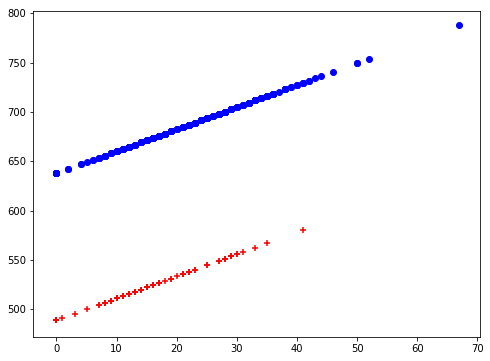

In [82]:
elemapi2_ = elemapi2.copy()

lm = smf.ols('api00 ~ yr_rnd + some_col', data = elemapi2_).fit()
print (lm.summary())

elemapi2_['pred'] = lm.predict()

plt.scatter(elemapi2_.query('yr_rnd == 0').some_col, elemapi2_.query('yr_rnd == 0').pred, c = "b", marker = "o")
plt.scatter(elemapi2_.query('yr_rnd == 1').some_col, elemapi2_.query('yr_rnd == 1').pred, c = "r", marker = "+")
plt.plot()

The coefficient for some_col indicates that for every unit increase in some_col the api00 score is predicted to increase by 2.23 units. This is the slope of the lines shown in the above graph. The graph has two lines, one for the year round schools and one for the non-year round schools. The coefficient for yr_rnd is -149.16, indicating that as yr_rnd increases by 1 unit, the api00 score is expected to decrease by about 149 units. As you can see in the graph, the top line is about 150 units higher than the lower line. You can see that the intercept is 637 and that is where the upper line crosses the Y axis when X is 0. The lower line crosses the line about 150 units lower at about 487.

### 3.7.2 Using categorical variable directly

We can run this analysis using the categorical variable directly. We need to use the specify which variables should be considered as categorical variables.

In [84]:
lm = smf.ols('api00 ~ C(yr_rnd) + some_col', data = elemapi2_).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     68.54
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           2.69e-26
Time:                        11:55:28   Log-Likelihood:                -2490.8
No. Observations:                 400   AIC:                             4988.
Df Residuals:                     397   BIC:                             5000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        637.8581     13.503     47.

## 3.8 Interactions of Continuous by 0/1 Categorical variables

Above we showed an analysis that looked at the relationship between some_col and api00 and also included yr_rnd. We saw that this produced a graph where we saw the relationship between some_col and api00 but there were two regression lines, one higher than the other but with equal slope. Such a model assumed that the slope was the same for the two groups. Perhaps the slope might be different for these groups. Let's run the regressions separately for these two groups beginning with the non-year round schools.

In [85]:
lm_0 = smf.ols(formula = "api00 ~ some_col", data = elemapi2.query('yr_rnd == 0')).fit()
lm_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.915
Date:                Fri, 14 Dec 2018   Prob (F-statistic):             0.0274
Time:                        12:14:15   Log-Likelihood:                -1938.2
No. Observations:                 308   AIC:                             3880.
Df Residuals:                     306   BIC:                             3888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    655.1103     15.237     42.995      0.000     625.128     685.093
some_col       1.4094      0.636      2.217      0.027       0.158       2.660
==============================================================================
Omnibus:                       63.461   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.387
Skew:                          -0.003   Prob(JB):                      0.00124
Kurtosis:                       1.979   Cond. No.                         48.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

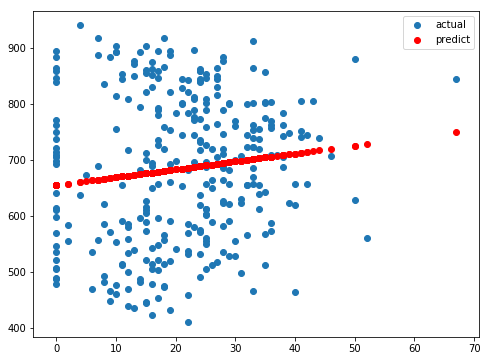

In [86]:
plt.scatter(elemapi2.query('yr_rnd == 0').some_col.values, elemapi2.query('yr_rnd == 0').api00.values, label = "actual")
plt.scatter(elemapi2.query('yr_rnd == 0').some_col.values, lm_0.predict(), c = "r", label = "predict")
plt.legend()
plt.show()

Likewise, let's look at the year round schools and we will use the same symbol statements as above.

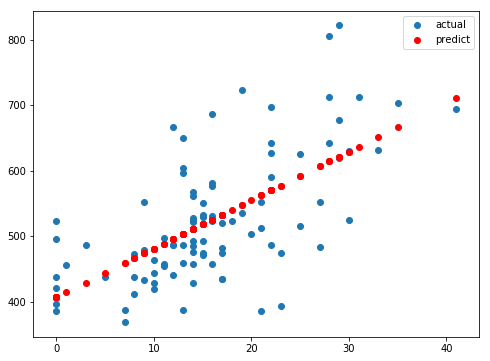

In [87]:
lm_1 = smf.ols(formula = "api00 ~ some_col", data = elemapi2.query('yr_rnd == 1')).fit()
plt.scatter(elemapi2.query('yr_rnd == 1').some_col.values, elemapi2.query('yr_rnd == 1').api00.values, label = "actual")
plt.scatter(elemapi2.query('yr_rnd == 1').some_col.values, lm_1.predict(), c = "r", label = "predict")
plt.legend()
plt.show()

Note that the slope of the regression line looks much steeper for the year round schools than for the non-year round schools. This is confirmed by the regression equations that show the slope for the year round schools to be higher (7.4) than non-year round schools (1.3). We can compare these to see if these are significantly different from each other by including the interaction of some_col by yr_rnd, an interaction of a continuous variable by a categorical variable.

### 3.7.1 Computing interactions manually

We will start by manually computing the interaction of some_col by yr_rnd.

Next, let's make a variable that is the interaction of some college (some_col) and year round schools (yr_rnd) called yrxsome.

In [88]:
yrxsome_elemapi = elemapi2
yrxsome_elemapi["yrxsome"] = yrxsome_elemapi.yr_rnd * yrxsome_elemapi.some_col

We can now run the regression that tests whether the coefficient for some_col is significantly different for year round schools and non-year round schools. Indeed, the yrxsome interaction effect is significant.

In [89]:
lm = smf.ols("api00 ~ some_col + yr_rnd + yrxsome", data = yrxsome_elemapi).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     52.05
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           2.21e-28
Time:                        12:18:29   Log-Likelihood:                -2483.6
No. Observations:                 400   AIC:                             4975.
Df Residuals:                     396   BIC:                             4991.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    655.1103     14.035     46.677      0.000     627.518     682.703
some_col       1.4094      0.586      2.407      0.017       0.258       2.561
yr_rnd      -248.0712     29.859     -8.308      0.000    -306.773    -189.369
yrxsome        5.9932      1.577      3.800      0.000       2.893       9.094
==============================================================================
Omnibus:                       23.863   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.350
Skew:                           0.023   Prob(JB):                      0.00932
Kurtosis:                       2.252   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can then save the predicted values to a data set and graph the predicted values for the two types of schools by some_col. You can see how the two lines have quite different slopes, consistent with the fact that the yrxsome interaction was significant.

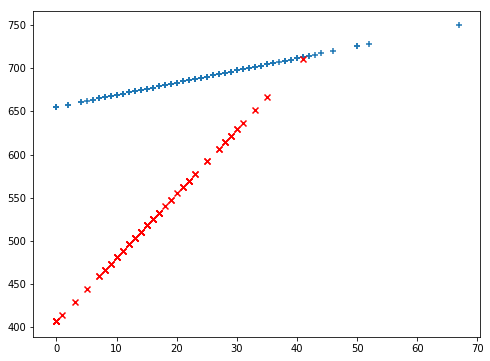

In [90]:
plt.scatter(yrxsome_elemapi.query('yr_rnd == 0').some_col, lm.predict()[yrxsome_elemapi.yr_rnd.values == 0], marker = "+")
plt.scatter(yrxsome_elemapi.query('yr_rnd == 1').some_col, lm.predict()[yrxsome_elemapi.yr_rnd.values == 1], c = "r", marker = "x")

We can also create a plot including the data points. There are multiple ways of doing this and we'll show both ways and their graphs here.

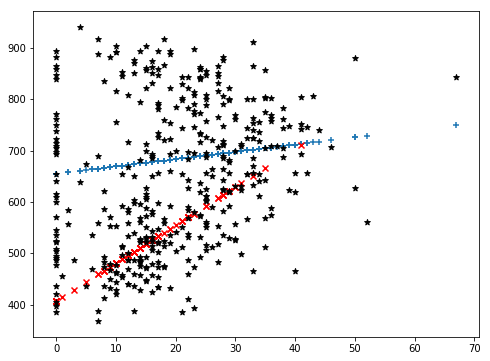

In [91]:
plt.scatter(yrxsome_elemapi.query('yr_rnd == 0').some_col, lm.predict()[yrxsome_elemapi.yr_rnd.values == 0], marker = "+")
plt.scatter(yrxsome_elemapi.query('yr_rnd == 1').some_col, lm.predict()[yrxsome_elemapi.yr_rnd.values == 1], c = "r", marker = "x")
plt.scatter(yrxsome_elemapi.some_col, yrxsome_elemapi.api00, c = "black", marker = "*")

We can further enhance it so the data points are marked with different symbols. The graph above used the same kind of symbols for the data points for both types of schools. Let's make separate variables for the api00 scores for the two types of schools called api0 for the non-year round schools and api1 for the year round schools.

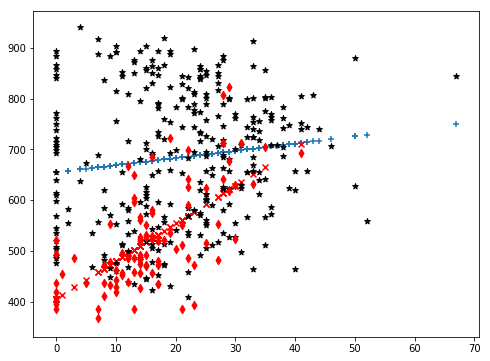

In [92]:
plt.scatter(yrxsome_elemapi.query('yr_rnd == 0').some_col, lm.predict()[yrxsome_elemapi.yr_rnd.values == 0], marker = "+")
plt.scatter(yrxsome_elemapi.query('yr_rnd == 1').some_col, lm.predict()[yrxsome_elemapi.yr_rnd.values == 1], c = "r", marker = "x")
plt.scatter(yrxsome_elemapi.query('yr_rnd == 0').some_col, yrxsome_elemapi.query('yr_rnd == 0').api00, c = "black", marker = "*")
plt.scatter(yrxsome_elemapi.query('yr_rnd == 1').some_col, yrxsome_elemapi.query('yr_rnd == 1').api00, c = "r", marker = "d")

Let's quickly run the regressions again where we performed separate regressions for the two groups. We first split data to yr_rnd = 0 group and yr_rnd = 1 group. Then run regression of api00 to some_col in each group seperately.

In [93]:
yrxsome_elemapi_0 = yrxsome_elemapi.query('yr_rnd == 0')
yrxsome_elemapi_1 = yrxsome_elemapi.query('yr_rnd == 1')


lm_0 = smf.ols("api00 ~ some_col", data = yrxsome_elemapi_0).fit()
print (lm_0.summary())

print ('\n')

lm_1 = smf.ols("api00 ~ some_col", data = yrxsome_elemapi_1).fit()
print (lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  api00   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.915
Date:                Fri, 14 Dec 2018   Prob (F-statistic):             0.0274
Time:                        12:21:22   Log-Likelihood:                -1938.2
No. Observations:                 308   AIC:                             3880.
Df Residuals:                     306   BIC:                             3888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    655.1103     15.237     42.995      0.0

Now, let's show the regression for both types of schools with the interaction term.

In [94]:
lm = smf.ols("api00 ~ some_col + yr_rnd + yrxsome", data = yrxsome_elemapi).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     52.05
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           2.21e-28
Time:                        12:21:58   Log-Likelihood:                -2483.6
No. Observations:                 400   AIC:                             4975.
Df Residuals:                     396   BIC:                             4991.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    655.1103     14.035     46.677      0.000     627.518     682.703
some_col       1.4094      0.586      2.407      0.017       0.258       2.561
yr_rnd      -248.0712     29.859     -8.308      0.000    -306.773    -189.369
yrxsome        5.9932      1.577      3.800      0.000       2.893       9.094
==============================================================================
Omnibus:                       23.863   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.350
Skew:                           0.023   Prob(JB):                      0.00932
Kurtosis:                       2.252   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that the coefficient for some_col in the combined analysis is the same as the coefficient for some_col for the non-year round schools? This is because non-year round schools are the reference group. Then, the coefficient for the yrxsome interaction in the combined analysis is the Bsome_col for the year round schools (7.4) minus Bsome_col for the non year round schools (1.41) yielding 5.99. This interaction is the difference in the slopes of some_col for the two types of schools, and this is why this is useful for testing whether the regression lines for the two types of schools are equal. If the two types of schools had the same regression coefficient for some_col, then the coefficient for the yrxsome interaction would be 0. In this case, the difference is significant, indicating that the regression lines are significantly different.

So, if we look at the graph of the two regression lines we can see the difference in the slopes of the regression lines (see graph below). Indeed, we can see that the non-year round schools (the solid line) have a smaller slope (1.4) than the slope for the year round schools (7.4). The difference between these slopes is 5.99, which is the coefficient for yrxsome.

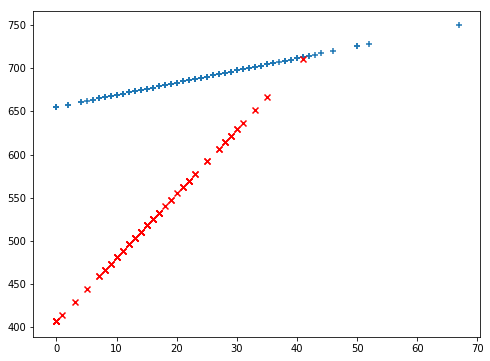

In [95]:
plt.scatter(yrxsome_elemapi.query('yr_rnd == 0').some_col, lm.predict()[yrxsome_elemapi.yr_rnd.values == 0], marker = "+")
plt.scatter(yrxsome_elemapi.query('yr_rnd == 1').some_col, lm.predict()[yrxsome_elemapi.yr_rnd.values == 1], c = "r", marker = "x")

### 3.7.2 Computing interactions with combinations

We can also run a model just like the model we showed above. We can include the terms yr_rnd some_col and the interaction yr_rnr*some_col.

In [96]:
lm = smf.ols("api00 ~ some_col + yr_rnd + yr_rnd * some_col ", data = yrxsome_elemapi).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     52.05
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           2.21e-28
Time:                        12:23:55   Log-Likelihood:                -2483.6
No. Observations:                 400   AIC:                             4975.
Df Residuals:                     396   BIC:                             4991.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         655.1103     14.035     46.677      0.000     627.518     682.703
some_col            1.4094      0.586      2.407      0.017       0.258       2.561
yr_rnd           -248.0712     29.859     -8.308      0.000    -306.773    -189.369
yr_rnd:some_col     5.9932      1.577      3.800      0.000       2.893       9.094
==============================================================================
Omnibus:                       23.863   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.350
Skew:                           0.023   Prob(JB):                      0.00932
Kurtosis:                       2.252   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this section we found that the relationship between some_col and api00 depended on whether the school was from year round schools or from non-year round schools. For the schools from year round schools, the relationship between some_col and api00 was significantly stronger than for those from non-year round schools. In general, this type of analysis allows you to test whether the strength of the relationship between two continuous variables varies based on the categorical variable.

## 3.8 Continuous and categorical variables, interaction with 1/2/3 variable

The prior examples showed how to do regressions with a continuous variable and a categorical variable that has two levels. These examples will extend this further by using a categorical variable with three levels, mealcat.

### 3.8.1 Manually creating dummy variables

We can use a data step to create all the dummy variables needed for the interaction of mealcat and some_col just as we did before for mealcat. With the dummy variables, we can use regression for the regression analysis. We'll use mealcat1 as the reference group.

In [97]:
mxcol_elemapi = elemapi2
mxcol_elemapi["mealcat1"] = mxcol_elemapi.mealcat == 1
mxcol_elemapi["mealcat2"] = mxcol_elemapi.mealcat == 2
mxcol_elemapi["mealcat3"] = mxcol_elemapi.mealcat == 3
mxcol_elemapi["mxcol1"] = mxcol_elemapi.mealcat1 * mxcol_elemapi.some_col
mxcol_elemapi["mxcol2"] = mxcol_elemapi.mealcat2 * mxcol_elemapi.some_col
mxcol_elemapi["mxcol3"] = mxcol_elemapi.mealcat3 * mxcol_elemapi.some_col

lm = smf.ols("api00 ~ some_col + mealcat2 + mealcat3 +  mxcol2 + mxcol3", data = mxcol_elemapi).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     263.0
Date:                Fri, 14 Dec 2018   Prob (F-statistic):          4.13e-123
Time:                        12:27:29   Log-Likelihood:                -2256.6
No. Observations:                 400   AIC:                             4525.
Df Residuals:                     394   BIC:                             4549.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          825.8937     11.992     68.871      0.000     802.318     849.470
mealcat2[T.True]  -239.0300     18.665    -12.806      0.000    -275.725    -202.334
mealcat3[T.True]  -344.9476     17.057    -20.223      0.000    -378.483    -311.413
some_col            -0.9473      0.487     -1.944      0.053      -1.906       0.011
mxcol2               3.1409      0.729      4.307      0.000       1.707       4.575
mxcol3               2.6073      0.896      2.910      0.004       0.846       4.369
==============================================================================
Omnibus:                        1.272   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.369
Skew:                          -0.114   Prob(JB):                        0.504
Kurtosis:                       2.826   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The interaction now has two terms (mxcol2 and mxcol3). These results indicate that the overall interaction is indeed significant. This means that the regression lines from the three groups differ significantly. As we have done before, let's compute the predicted values and make a graph of the predicted values so we can see how the regression lines differ.

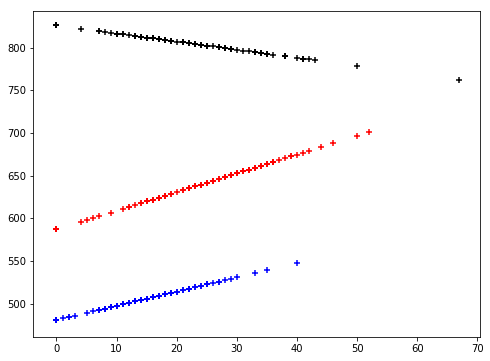

In [98]:
plt.scatter(mxcol_elemapi.query('mealcat == 1').some_col, lm.predict()[mxcol_elemapi.mealcat.values == 1], c = "black", marker = "+")
plt.scatter(mxcol_elemapi.query('mealcat == 2').some_col, lm.predict()[mxcol_elemapi.mealcat.values == 2], c = "red", marker = "+")
plt.scatter(mxcol_elemapi.query('mealcat == 3').some_col, lm.predict()[mxcol_elemapi.mealcat.values == 3], c = "b", marker = "+")

Group 1 was the omitted group, therefore the slope of the line for group 1 is the coefficient for some_col which is -.94. Indeed, this line has a downward slope. If we add the coefficient for some_col to the coefficient for mxcol2 we get the coefficient for group 2, i.e., 3.14 + (-.94) yields 2.2, the slope for group 2. Indeed, group 2 shows an upward slope. Likewise, if we add the coefficient for some_col to the coefficient for mxcol3 we get the coefficient for group 3, i.e., 2.6 + (-.94) yields 1.66, the slope for group 3,. So, the slopes for the 3 groups are

group 1: -0.94

group 2:  2.2

group 3:  1.66

The test of the coefficient in the parameter estimates for mxcol2 tested whether the coefficient for group 2 differed from group 1, and indeed this was significant. Likewise, the test of the coefficient for mxcol3 tested whether the coefficient for group 3 differed from group 1, and indeed this was significant. What did the test of the coefficient some_col test? This coefficient represents the coefficient for group 1, so this tested whether the coefficient for group 1 (-0.94) was significantly different from 0. This is probably a non-interesting test.

The comparisons in the above analyses don't seem to be as interesting as comparing group 1 versus 2 and then comparing group 2 versus 3. These successive comparisons seem much more interesting. We can do this by making group 2 the omitted group, and then each group would be compared to group 2.

In [100]:
lm = smf.ols("api00 ~ some_col + mealcat1 + mealcat3 +  mxcol1 + mxcol3", data = mxcol_elemapi).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     263.0
Date:                Fri, 14 Dec 2018   Prob (F-statistic):          4.13e-123
Time:                        12:33:30   Log-Likelihood:                -2256.6
No. Observations:                 400   AIC:                             4525.
Df Residuals:                     394   BIC:                             4549.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          586.8637     14.303     41.030      0.000     558.744     614.984
mealcat1[T.True]   239.0300     18.665     12.806      0.000     202.334     275.725
mealcat3[T.True]  -105.9176     18.754     -5.648      0.000    -142.789     -69.046
some_col             2.1936      0.543      4.043      0.000       1.127       3.260
mxcol1              -3.1409      0.729     -4.307      0.000      -4.575      -1.707
mxcol3              -0.5336      0.927     -0.576      0.565      -2.357       1.289
==============================================================================
Omnibus:                        1.272   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.369
Skew:                          -0.114   Prob(JB):                        0.504
Kurtosis:                       2.826   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, the test of mxcol1 tests whether the coefficient for group 1 differs from group 2, and it does. Then, the test of mxcol3 tests whether the coefficient for group 3 significantly differs from group 2, and it does not. This makes sense given the graph and given the estimates of the coefficients that we have, that -.94 is significantly different from 2.2 but 2.2 is not significantly different from 1.66.

### 3.8.2 Using the combinations

We can perform the same analysis using the C and combinations directly as shown below. This allows us to avoid dummy coding for either the categorical variable mealcat and for the interaction term of mealcat and some_col. The tricky part is to control the reference group.

In [101]:
lm = smf.ols("api00 ~ some_col + C(mealcat) + some_col * C(mealcat)", data = mxcol_elemapi).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  api00   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     263.0
Date:                Fri, 14 Dec 2018   Prob (F-statistic):          4.13e-123
Time:                        12:38:19   Log-Likelihood:                -2256.6
No. Observations:                 400   AIC:                             4525.
Df Residuals:                     394   BIC:                             4549.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  825.8937     11.992     68.871      0.000     802.318     849.470
C(mealcat)[T.2]           -239.0300     18.665    -12.806      0.000    -275.725    -202.334
C(mealcat)[T.3]           -344.9476     17.057    -20.223      0.000    -378.483    -311.413
some_col                    -0.9473      0.487     -1.944      0.053      -1.906       0.011
some_col:C(mealcat)[T.2]     3.1409      0.729      4.307      0.000       1.707       4.575
some_col:C(mealcat)[T.3]     2.6073      0.896      2.910      0.004       0.846       4.369
==============================================================================
Omnibus:                        1.272   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.369
Skew:                          -0.114   Prob(JB):                        0.504
Kurtosis:                       2.826   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Because the default order for categorical variables is their numeric values, glm omits the third category. On the other hand, the analysis we showed in previous section omitted the second category, the parameter estimates will not be the same. You can compare the results from below with the results above and see that the parameter estimates are not the same. Because group 3 is dropped, that is the reference category and all comparisons are made with group 3.

These analyses showed that the relationship between some_col and api00 varied, depending on the level of mealcat. In comparing group 1 with group 2, the coefficient for some_col was significantly different, but there was no difference in the coefficient for some_col in comparing groups 2 and 3.

## 3.9 Summary

This chapter covered some techniques for analyzing data with categorical variables, especially, manually constructing indicator variables and using the categorical regression formula. Each method has its advantages and disadvantages, as described below.

Manually constructing indicator variables can be very tedious and even error prone. For very simple models, it is not very difficult to create your own indicator variables, but if you have categorical variables with many levels and/or interactions of categorical variables, it can be laborious to manually create indicator variables. However, the advantage is that you can have quite a bit of control over how the variables are created and the terms that are entered into the model.

The C formula approach eliminates the need to create indicator variables making it easy to include variables that have lots of categories, and making it easy to create interactions by allowing you to include terms like some_col * mealcat. It can be easier to perform tests of simple main effects. However, this is not very flexible in letting you choose which category is the omitted category.

As you will see in the next chapter, the regression command includes additional options like the robust option and the cluster option that allow you to perform analyses when you don't exactly meet the assumptions of ordinary least squares regression.